<div style="background-color: #eee3d3">
<h1> 4-normalisation_scaling.ipynb </h1>
</div>

---

# The purpose of this notebook is to use different methods to normalise the data in our peak table :

- ### Transformation : Each value in the peak table is transformed individually, based on a mathematical function
- ### Scaling : Each value in the peak table is transformed based on other values in the same column (feature/metabolite-based)
- ### Normalisation : Each value in the peak table is transformed based on other values in the same row (sample-based)

For each of these three main type of data manipulation, different methods are implemented in this notebook

---

## References 

- Why normalisation : https://pubmed.ncbi.nlm.nih.gov/32276547/

- Sample normalisation : https://pubmed.ncbi.nlm.nih.gov/26763302/

## Import modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
import seaborn as sns
import math
import numpy as np

import os

In [2]:
import re
pwd = ! pwd
pwd = re.sub('notebooks', '', pwd[0])
print(f'Working directory : {pwd}')

import sys
sys.path.append(pwd + 'bin/')

from normalisation_scaling_functions import *

Working directory : /home/jovyan/work/


In [3]:
# Tune the visual settings for figures in seaborn
sns.set_context(
    "notebook", font_scale=1.2, rc={"axes.titlesize": 15}
)

from matplotlib import rcParams

rcParams["figure.figsize"] = 12, 8

sns.set_theme(style="darkgrid")

## Import data

We import the peak table we inputed with the most suitable method dtermined in the previous notebook 

In [4]:
peakTable_imputed = pd.read_csv(pwd + 'data/peakTable/chosen_imputed_peakTable/' +
                                [file for file in os.listdir(pwd + 'data/peakTable/chosen_imputed_peakTable') if file.endswith('.csv')][0], sep=',', decimal='.', na_values='NA')
peakTable_imputed

,SampleID,Groups,MatchCaseset,TypTumo,CaseHCCWide,EPICID,EPICBioID,AliquotID,variable_3,variable_5,...,variable_2326,variable_2328,variable_2329,variable_2332,variable_2339,variable_2340,variable_2350,variable_2364,variable_2365,variable_2370
0,LivCan_153,Incident,82,HCC,Yes,41____41041872,41____41041872,41041872-s2#C,19.761786,14.635833,...,13.194216,12.885181,12.037727,13.330208,12.052252,12.568647,13.192848,12.248590,12.114328,12.355017
1,LivCan_154,Non-case,82,NaN,No,41____41046868,41____41046868,41046868-s2#C,19.735279,15.193396,...,12.700734,12.742979,11.929552,13.464403,13.020365,12.928643,13.697314,12.604052,12.082056,12.208084
2,LivCan_267,Incident,427,HCC,Yes,41____41074588,41____41074588,41074588-s1#B,19.116076,15.446714,...,12.618229,12.485436,11.709115,12.719966,12.578127,12.533468,12.859724,12.118557,12.105708,12.392558
3,LivCan_268,Non-case,427,NaN,No,41____41089214,41____41089214,41089214-s1#B,19.376875,15.460525,...,12.720631,12.564338,12.067922,13.397322,12.591688,12.515044,13.086805,12.099655,11.605353,12.319119
4,LivCan_299,Incident,376,HCC_Wide,Yes,21____21103888,21____21103888,21103888-s1#B,19.555938,14.515536,...,12.564943,12.344968,12.127879,12.741220,12.707795,12.508132,12.956176,12.349830,11.926237,12.381520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,LivCan_080,Non-case,56,NaN,No,32____3208004E,32____32253231,32253231-s3#C,19.664978,14.447858,...,12.533036,12.125251,12.065149,12.686218,12.349299,11.505004,13.189121,11.963865,12.100263,12.301608
182,LivCan_375,Incident,383,HCC,Yes,22____22281416,22____22281416,22281416-s1#B,19.301954,14.839941,...,13.428278,12.629126,12.360380,12.410226,12.909283,12.642143,12.631445,12.708850,12.462751,12.635066
183,LivCan_376,Non-case,383,NaN,No,22____22281701,22____22281701,22281701-s1#B,19.170626,14.291711,...,13.213899,12.799193,11.870228,12.680070,12.846355,13.243400,13.001685,12.199647,12.074455,12.258149
184,LivCan_165,Incident,147,HCC,Yes,71____71000825,71____71000065,71000065-s2#C,18.869505,14.440576,...,12.442173,12.291946,12.035968,12.554394,12.477753,11.789382,12.940688,11.628154,12.117310,12.265073


In [5]:
metadata = peakTable_imputed.iloc[:, ['variable' not in col for col in peakTable_imputed.columns]]
metadata

,SampleID,Groups,MatchCaseset,TypTumo,CaseHCCWide,EPICID,EPICBioID,AliquotID
0,LivCan_153,Incident,82,HCC,Yes,41____41041872,41____41041872,41041872-s2#C
1,LivCan_154,Non-case,82,NaN,No,41____41046868,41____41046868,41046868-s2#C
2,LivCan_267,Incident,427,HCC,Yes,41____41074588,41____41074588,41074588-s1#B
3,LivCan_268,Non-case,427,NaN,No,41____41089214,41____41089214,41089214-s1#B
4,LivCan_299,Incident,376,HCC_Wide,Yes,21____21103888,21____21103888,21103888-s1#B
...,...,...,...,...,...,...,...,...
181,LivCan_080,Non-case,56,NaN,No,32____3208004E,32____32253231,32253231-s3#C
182,LivCan_375,Incident,383,HCC,Yes,22____22281416,22____22281416,22281416-s1#B
183,LivCan_376,Non-case,383,NaN,No,22____22281701,22____22281701,22281701-s1#B
184,LivCan_165,Incident,147,HCC,Yes,71____71000825,71____71000065,71000065-s2#C


In [6]:
X = peakTable_imputed.iloc[:, ['variable' in col for col in peakTable_imputed.columns]]
X.head()

,variable_3,variable_5,variable_6,variable_8,variable_10,variable_11,variable_14,variable_22,variable_23,variable_25,...,variable_2326,variable_2328,variable_2329,variable_2332,variable_2339,variable_2340,variable_2350,variable_2364,variable_2365,variable_2370
0,19.761786,14.635833,22.185582,12.615143,15.580604,15.881437,17.500899,12.792893,16.805604,16.805842,...,13.194216,12.885181,12.037727,13.330208,12.052252,12.568647,13.192848,12.248590,12.114328,12.355017
1,19.735279,15.193396,20.831414,12.551386,15.145423,14.034654,17.953780,12.536280,15.907714,14.977232,...,12.700734,12.742979,11.929552,13.464403,13.020365,12.928643,13.697314,12.604052,12.082056,12.208084
2,19.116076,15.446714,22.152604,12.513215,14.628890,15.316772,17.404715,12.786407,15.947176,16.238502,...,12.618229,12.485436,11.709115,12.719966,12.578127,12.533468,12.859724,12.118557,12.105708,12.392558
3,19.376875,15.460525,22.169389,12.720767,15.937169,15.967749,15.836957,12.509034,16.371211,17.052231,...,12.720631,12.564338,12.067922,13.397322,12.591688,12.515044,13.086805,12.099655,11.605353,12.319119
4,19.555938,14.515536,22.150249,12.314019,14.950203,15.294906,16.610171,12.214057,16.171763,16.107590,...,12.564943,12.344968,12.127879,12.741220,12.707795,12.508132,12.956176,12.349830,11.926237,12.381520


#### We will use different methods to normalise/scale our data so the function <code>print_stats</code> allows to see min/max/mean/std means of columns

In [7]:
print_stats(X)

----------X.min().mean()----------
 13.182941810168705 

----------X.max().mean()----------
 16.327455315516996 

----------X.mean().mean()---------
 14.61191615205638 

----------X.std().mean()----------
 0.524517707467114 



# Some visualisations

### First, we want to observe the distribution of the first features before normalisation

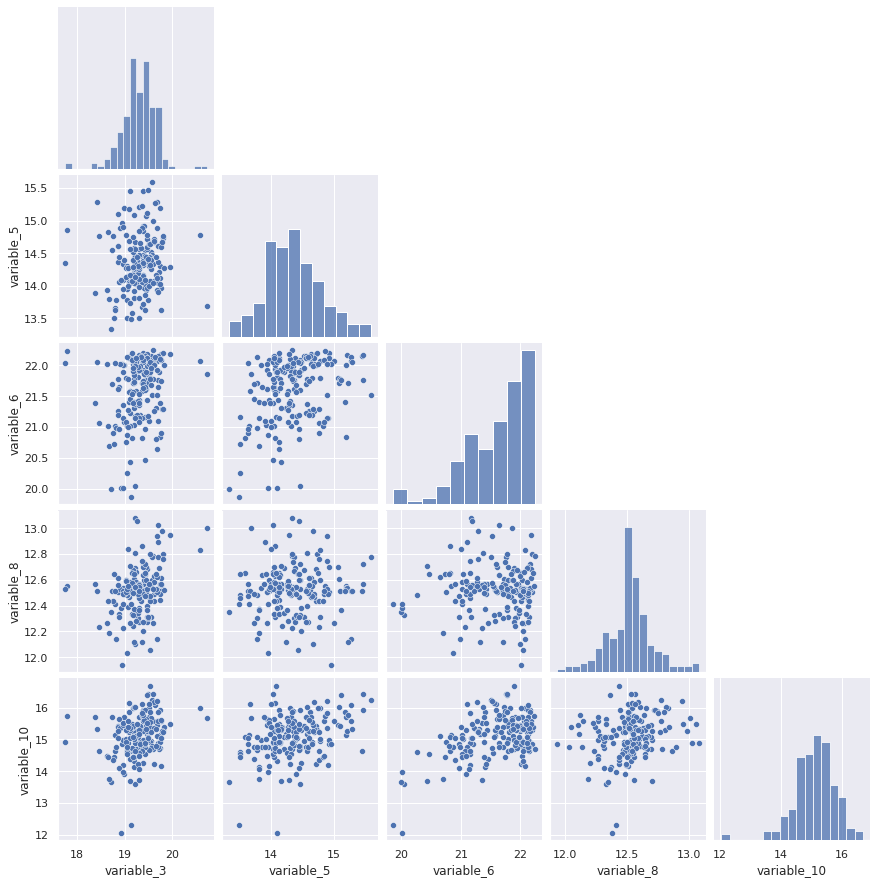

In [8]:
nb_features = 5
sns.pairplot(data=X,
             x_vars=X.iloc[:,:nb_features],
             y_vars=X.iloc[:,:nb_features],
             corner=True);

#### Some features seem to be normally distributed, some others don't

#### On the pairplots, we could also have observed some features linked by a linear relationship (here that is not the case but that could be for other features)

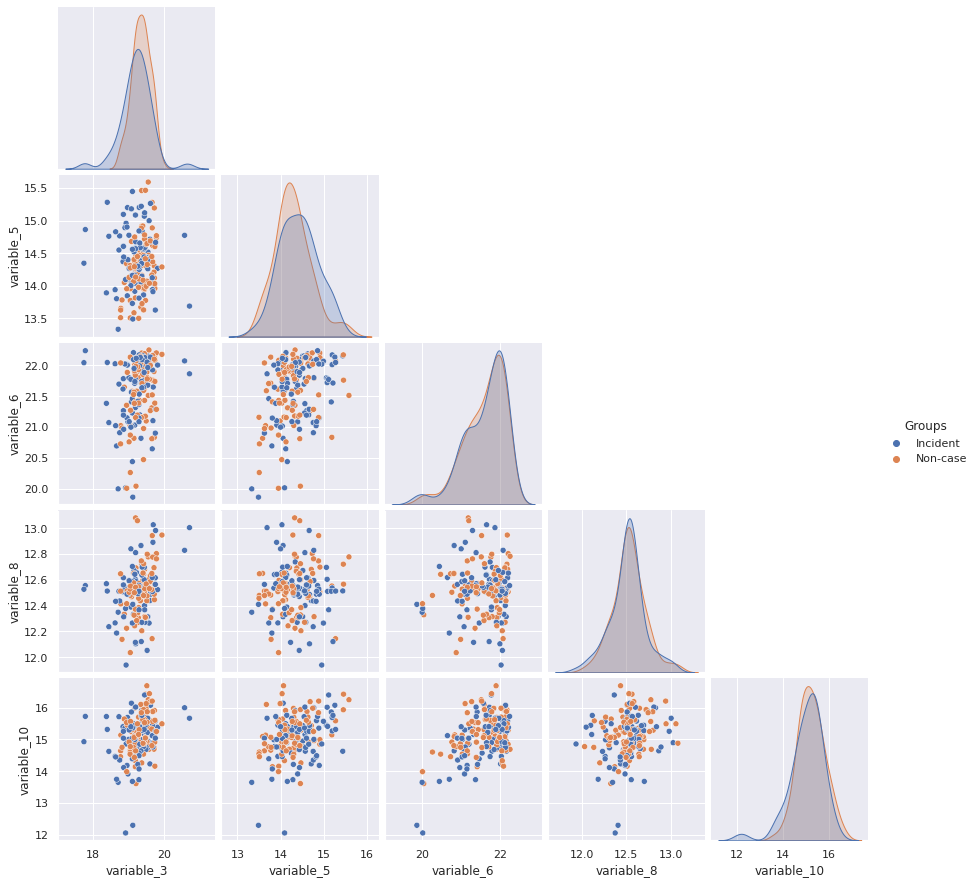

In [9]:
nb_features = 5
sns.pairplot(data=peakTable_imputed,
             hue='Groups',
             x_vars=peakTable_imputed[X.columns].iloc[:,:nb_features],
             y_vars=peakTable_imputed[X.columns].iloc[:,:nb_features],
             corner=True);

#### Here we can just plot the distributions of the first 4 features

#### The following two functions will be used later to show the impact of the normalisation/scaling methods on features and sample distributions

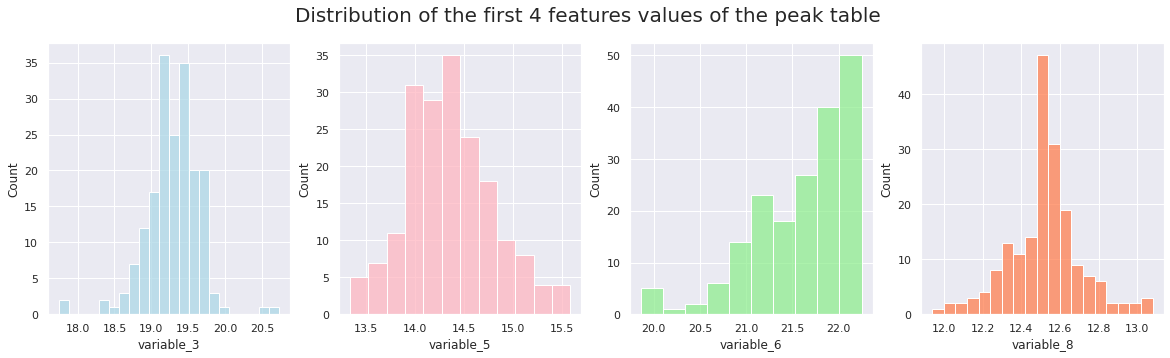

In [10]:
plot_first_distributions_metabolites(X)

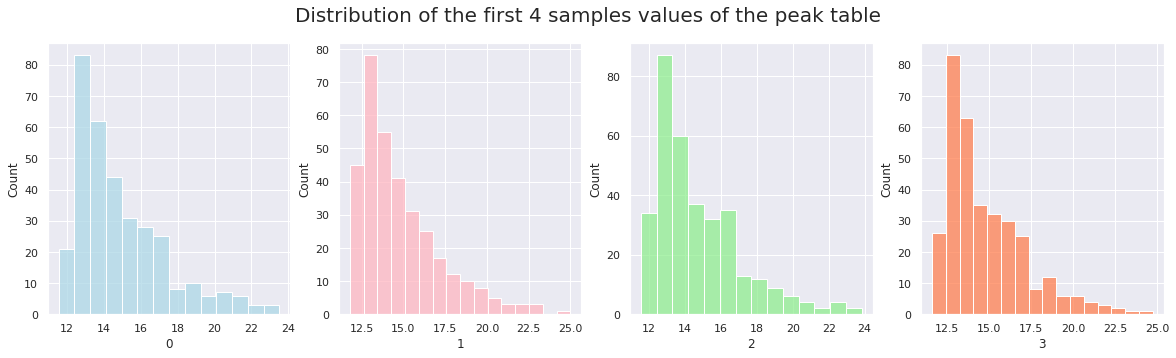

In [11]:
plot_first_distributions_samples(X)

We can see that the values can be in a different range according to the feature. For further analysis, it would be better to apply a few transformation on our peak table :
- a __transformation__ (for example apply $log_2$) on all values in the peak table
- a __scaling__ (for example with [StandardScaler of scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)) on each feature to have a __mean value of 0 et a std of 1__
- a __normalisation__ (for example with [Normalizer of scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html?highlight=normalizer#sklearn.preprocessing.Normalizer)) on each samples to have a __vector norm equal to 1__

This will allow to compare with an equal weight (importance) all features and all samples.

#### We can also observe the values taken by the features with the boxplot visualisation

Here we can choose how many of the first features we want to observe (below is 20)

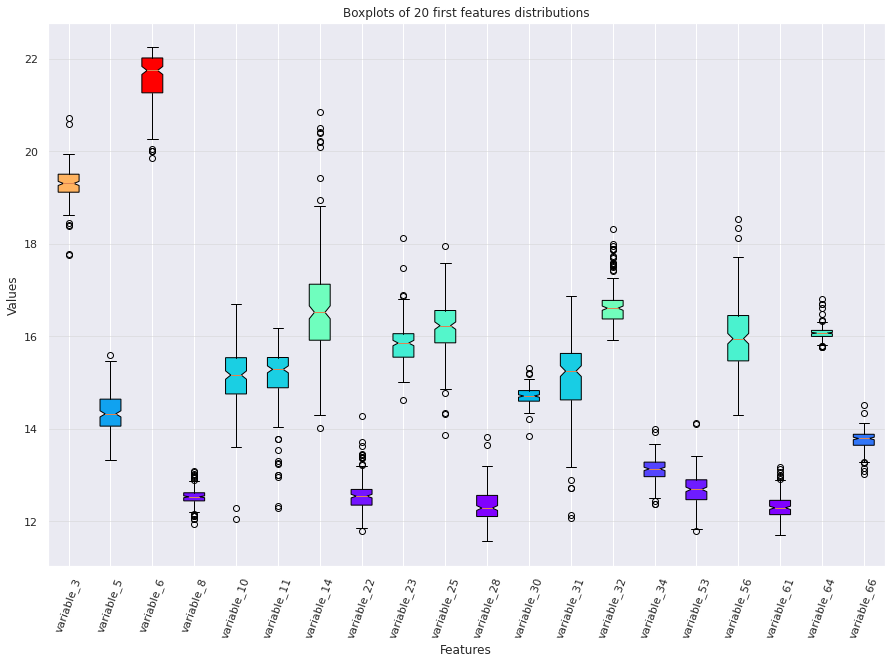

In [12]:
boxplot_first_distributions_metabolites(X, n=20)

We can also just pass the list of column names we want to visualise

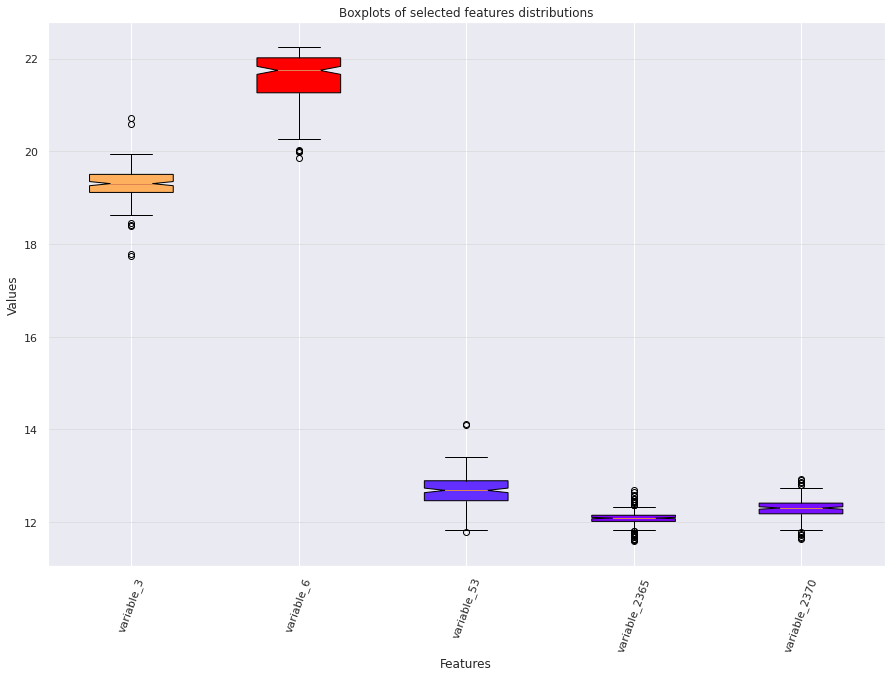

In [13]:
boxplot_first_distributions_metabolites(X, list_features=['variable_3', 'variable_6', 'variable_53', 'variable_2365', 'variable_2370'])

# Transformation methods

### Each value in the peak table is transformed individually, based on a mathematical function

Inspired by [this link](https://www.statology.org/transform-data-in-python/), we can transform our data to make it more normally distributed, with one of the following methods, for each value $x_{ij}$ in the peak table :

<table>
  <tr>
    <th>Method</th>
    <th>Formula</th>
  </tr>
  <tr>
    <td>base-e log (natural log)</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = log_{e}(x_{ij})
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>base-2 log</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = log_{2}(x_{ij})
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>base-10 log</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = log_{10}(x_{ij})
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>Square Root</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = \sqrt{x_{ij}}
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>Cubic Root</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = \sqrt[3]{x_{ij}}
        \end{eqnarray}
    </td>
  </tr>
</table>

## Based-e log

In [14]:
normPeakTable(X, 'loge', based='metabolite')

,variable_3,variable_5,variable_6,variable_8,variable_10,variable_11,variable_14,variable_22,variable_23,variable_25,...,variable_2326,variable_2328,variable_2329,variable_2332,variable_2339,variable_2340,variable_2350,variable_2364,variable_2365,variable_2370
0,2.983750,2.683473,3.099443,2.534898,2.746027,2.765151,2.862252,2.548890,2.821712,2.821727,...,2.579779,2.556078,2.488046,2.590033,2.489252,2.531205,2.579675,2.505411,2.494389,2.514062
1,2.982408,2.720861,3.036462,2.529831,2.717698,2.641530,2.887801,2.528627,2.766804,2.706531,...,2.541660,2.544980,2.479019,2.600049,2.566515,2.559445,2.617200,2.534018,2.491721,2.502098
2,2.950530,2.737396,3.097955,2.526785,2.682998,2.728948,2.856741,2.548383,2.769282,2.787385,...,2.535143,2.524563,2.460368,2.543173,2.531959,2.528403,2.554100,2.494738,2.493677,2.517096
3,2.964080,2.738290,3.098712,2.543236,2.768654,2.770571,2.762346,2.526451,2.795524,2.836281,...,2.543225,2.530862,2.490551,2.595055,2.533037,2.526931,2.571604,2.493177,2.451466,2.511152
4,2.973279,2.675220,3.097849,2.510738,2.704725,2.727520,2.810015,2.502588,2.783267,2.779291,...,2.530911,2.513249,2.495507,2.544842,2.542216,2.526379,2.561573,2.513642,2.478741,2.516205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,2.978839,2.670546,3.035362,2.537525,2.695097,2.656400,2.840632,2.491610,2.733612,2.731292,...,2.528368,2.495290,2.490321,2.540516,2.513599,2.442782,2.579392,2.481891,2.493227,2.509730
182,2.960206,2.697322,3.048570,2.526582,2.673331,2.718871,2.822366,2.521933,2.801811,2.769671,...,2.597363,2.536006,2.514496,2.518521,2.557947,2.537036,2.536189,2.542299,2.522744,2.536476
183,2.953379,2.659680,3.062545,2.525693,2.669653,2.675565,2.792139,2.550103,2.748121,2.742315,...,2.581269,2.549382,2.474033,2.540031,2.553060,2.583499,2.565079,2.501407,2.491092,2.506191
184,2.937547,2.670042,3.042687,2.510602,2.647172,2.622954,2.779447,2.539034,2.773924,2.698649,...,2.521092,2.508944,2.487899,2.530071,2.523947,2.467199,2.560376,2.453429,2.494635,2.506756


#### On the plot below, we can observe the boxplots for the number of features we select, before and after the transformation

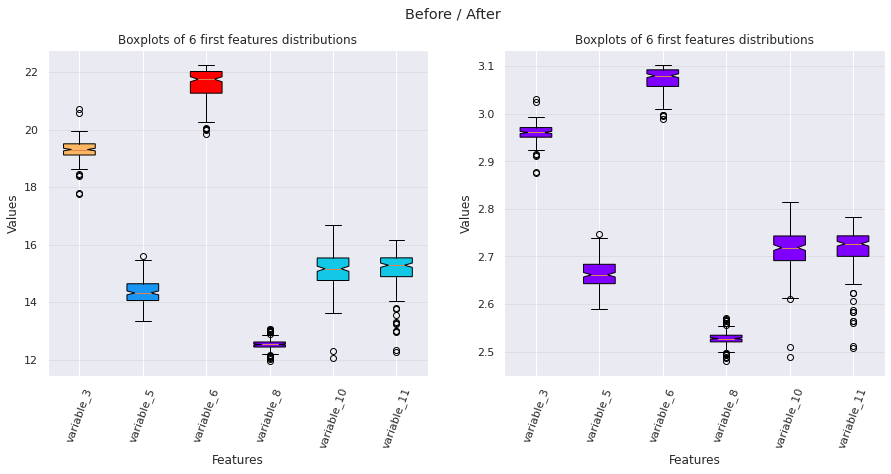

In [15]:
boxplot_first_distributions_metabolites_before_after(X_init=X, X_norm=normPeakTable(X, 'loge', based='metabolite'), n=6)

#### We can also pass a list of features we want to plot

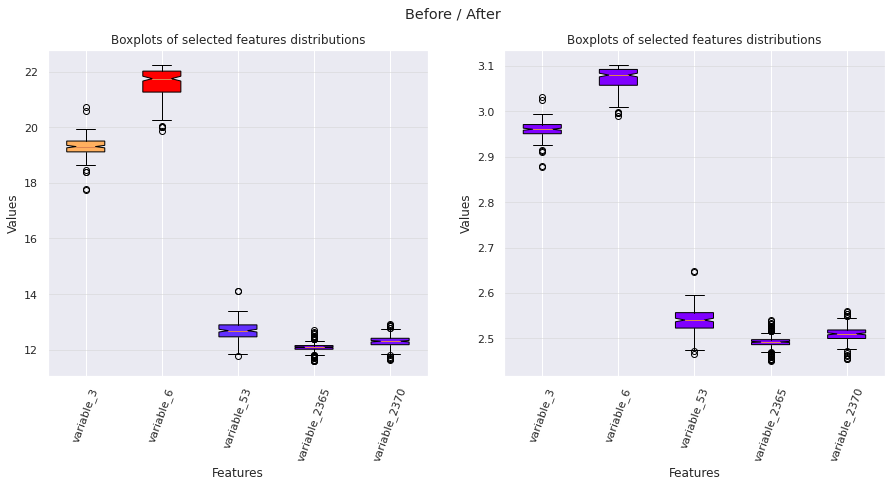

In [16]:
list_features = ['variable_3', 'variable_6', 'variable_53', 'variable_2365', 'variable_2370']
boxplot_first_distributions_metabolites_before_after(X_init=X, X_norm=normPeakTable(X, 'loge', based='metabolite'), list_features=list_features)

## Based-2 log

In [17]:
normPeakTable(X, 'log2', based='metabolite')

,variable_3,variable_5,variable_6,variable_8,variable_10,variable_11,variable_14,variable_22,variable_23,variable_25,...,variable_2326,variable_2328,variable_2329,variable_2332,variable_2339,variable_2340,variable_2350,variable_2364,variable_2365,variable_2370
0,4.304641,3.871433,4.471551,3.657085,3.961679,3.989270,4.129357,3.677271,4.070870,4.070891,...,3.721834,3.687641,3.589491,3.736627,3.591231,3.651757,3.721684,3.614544,3.598643,3.627025
1,4.302705,3.925373,4.380689,3.649775,3.920810,3.810922,4.166216,3.648037,3.991655,3.904699,...,3.666840,3.671631,3.576468,3.751078,3.702698,3.692499,3.775821,3.655816,3.594794,3.609765
2,4.256715,3.949228,4.469404,3.645381,3.870748,3.937040,4.121406,3.676539,3.995229,4.021347,...,3.657438,3.642174,3.549560,3.669023,3.652845,3.647714,3.684788,3.599146,3.597616,3.631402
3,4.276264,3.950517,4.470497,3.669114,3.994323,3.997089,3.985223,3.644898,4.033089,4.091889,...,3.669098,3.651263,3.593105,3.743873,3.654400,3.645591,3.710041,3.596894,3.536719,3.622827
4,4.289535,3.859526,4.469251,3.622230,3.902093,3.934979,4.053995,3.610471,4.015405,4.009669,...,3.651332,3.625851,3.600255,3.671432,3.667642,3.644794,3.695568,3.626419,3.576067,3.630116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,4.297557,3.852784,4.379101,3.660875,3.888203,3.832375,4.098165,3.594633,3.943769,3.940422,...,3.647664,3.599943,3.592774,3.665190,3.626357,3.524190,3.721277,3.580612,3.596967,3.620775
182,4.270675,3.891413,4.398157,3.645087,3.856801,3.922502,4.071813,3.638380,4.042159,3.995791,...,3.747202,3.658683,3.627651,3.633457,3.690337,3.660169,3.658948,3.667762,3.639551,3.659361
183,4.260826,3.837107,4.418319,3.643805,3.851495,3.860025,4.028206,3.679020,3.964700,3.956324,...,3.723984,3.677981,3.569276,3.664491,3.683287,3.727202,3.700627,3.608767,3.593886,3.615669
184,4.237985,3.852056,4.389669,3.622033,3.819063,3.784123,4.009895,3.663052,4.001926,3.893328,...,3.637167,3.619641,3.589280,3.650121,3.641286,3.559416,3.693842,3.539550,3.598998,3.616484


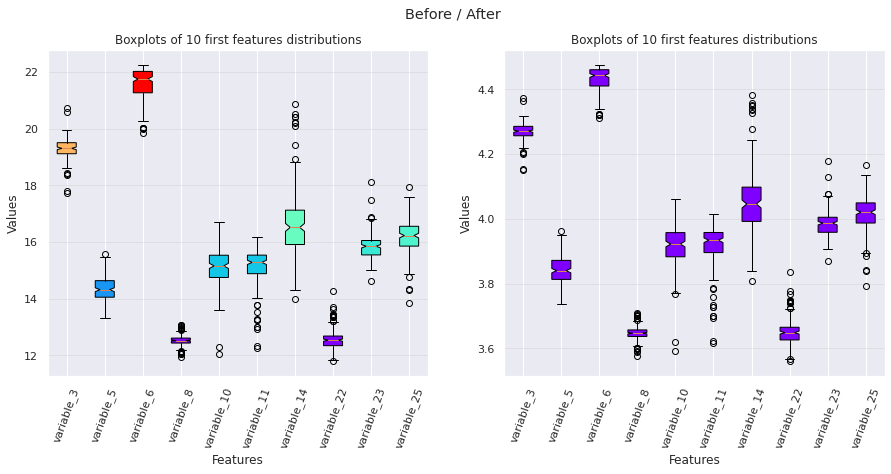

In [19]:
boxplot_first_distributions_metabolites_before_after(X_init=X, X_norm=normPeakTable(X, 'log2', based='metabolite')) # default number of displayed features is 10

## Based-10 log

In [20]:
normPeakTable(X, 'log10', based='metabolite')

,variable_3,variable_5,variable_6,variable_8,variable_10,variable_11,variable_14,variable_22,variable_23,variable_25,...,variable_2326,variable_2328,variable_2329,variable_2332,variable_2339,variable_2340,variable_2350,variable_2364,variable_2365,variable_2370
0,1.295826,1.165417,1.346071,1.100892,1.192584,1.200890,1.243060,1.106969,1.225454,1.225460,...,1.120384,1.110091,1.080545,1.124837,1.081068,1.099289,1.120339,1.088086,1.083299,1.091843
1,1.295243,1.181655,1.318719,1.098692,1.180281,1.147202,1.254156,1.098169,1.201608,1.175432,...,1.103829,1.105271,1.076624,1.129187,1.114623,1.111553,1.136635,1.100510,1.082141,1.086648
2,1.281399,1.188836,1.345425,1.097369,1.165211,1.185167,1.240667,1.106749,1.202684,1.210546,...,1.100998,1.096404,1.068524,1.104486,1.099616,1.098071,1.109232,1.083451,1.082990,1.093161
3,1.287284,1.189224,1.345754,1.104513,1.202411,1.203244,1.199672,1.097224,1.214081,1.231781,...,1.104509,1.099140,1.081632,1.127018,1.100084,1.097432,1.116834,1.082773,1.064658,1.090580
4,1.291279,1.161833,1.345379,1.090400,1.174647,1.184547,1.220374,1.086860,1.208757,1.207031,...,1.099161,1.091490,1.083785,1.105211,1.104070,1.097192,1.112477,1.091661,1.076503,1.092774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,1.293693,1.159803,1.318241,1.102033,1.170466,1.153660,1.233671,1.082092,1.187193,1.186185,...,1.098056,1.083691,1.081533,1.103332,1.091642,1.060887,1.120216,1.077871,1.082795,1.089962
182,1.285601,1.171432,1.323977,1.097281,1.161013,1.180791,1.225738,1.095262,1.216811,1.202853,...,1.128020,1.101373,1.092032,1.093780,1.110902,1.101821,1.101453,1.104106,1.095614,1.101578
183,1.282636,1.155084,1.330047,1.096895,1.159416,1.161983,1.212611,1.107495,1.193494,1.190972,...,1.121031,1.107183,1.074459,1.103122,1.108780,1.121999,1.114000,1.086347,1.081868,1.088425
184,1.275761,1.159585,1.321422,1.090341,1.149652,1.139134,1.207099,1.102688,1.204700,1.172008,...,1.094896,1.089621,1.080481,1.098796,1.096136,1.071491,1.111957,1.065511,1.083406,1.088670


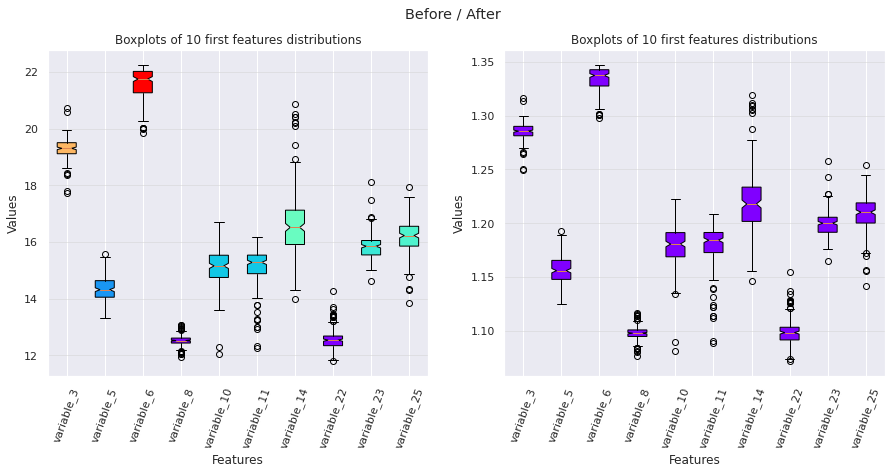

In [23]:
boxplot_first_distributions_metabolites_before_after(X_init=X, X_norm=normPeakTable(X, 'log10', based='metabolite'))

## Square root

In [24]:
normPeakTable(X, 'sqrt', based='metabolite')

,variable_3,variable_5,variable_6,variable_8,variable_10,variable_11,variable_14,variable_22,variable_23,variable_25,...,variable_2326,variable_2328,variable_2329,variable_2332,variable_2339,variable_2340,variable_2350,variable_2364,variable_2365,variable_2370
0,4.445423,3.825681,4.710157,3.551780,3.947227,3.985152,4.183408,3.576715,4.099464,4.099493,...,3.632384,3.589593,3.469543,3.651056,3.471635,3.545229,3.632196,3.499799,3.480564,3.514970
1,4.442441,3.897871,4.564144,3.542794,3.891712,3.746285,4.237190,3.540661,3.988448,3.870043,...,3.563809,3.569731,3.453918,3.669387,3.608374,3.595642,3.700988,3.550219,3.475925,3.494007
2,4.372194,3.930231,4.706655,3.537402,3.824773,3.913665,4.171896,3.575809,3.993392,4.029702,...,3.552215,3.533474,3.421858,3.566506,3.546566,3.540264,3.586046,3.481172,3.479326,3.520307
3,4.401917,3.931987,4.708438,3.566618,3.992138,3.995967,3.979567,3.536811,4.046135,4.129435,...,3.566599,3.544621,3.473891,3.660235,3.548477,3.537661,3.617569,3.478456,3.406663,3.509860
4,4.422210,3.809926,4.706405,3.509134,3.866549,3.910870,4.075558,3.494862,4.021413,4.013426,...,3.544706,3.513541,3.482510,3.569485,3.564799,3.536684,3.599469,3.514233,3.453438,3.518738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,4.434521,3.801034,4.561634,3.556449,3.847980,3.774244,4.138427,3.475732,3.922802,3.918254,...,3.540203,3.482133,3.473492,3.561772,3.514157,3.391903,3.631683,3.458882,3.478543,3.507365
182,4.393399,3.852264,4.591860,3.537042,3.806330,3.893995,4.100804,3.528830,4.058874,3.994170,...,3.664461,3.553748,3.515733,3.522815,3.592949,3.555579,3.554074,3.564947,3.530262,3.554584
183,4.378427,3.780438,4.624058,3.535471,3.799337,3.810585,4.039293,3.578885,3.951362,3.939908,...,3.635093,3.577596,3.445320,3.560909,3.584181,3.639148,3.605785,3.492799,3.474832,3.501164
184,4.343904,3.800076,4.578371,3.508894,3.756870,3.711652,4.013741,3.559133,4.002671,3.854821,...,3.527347,3.505987,3.469289,3.543218,3.532386,3.433567,3.597317,3.410008,3.480993,3.502153


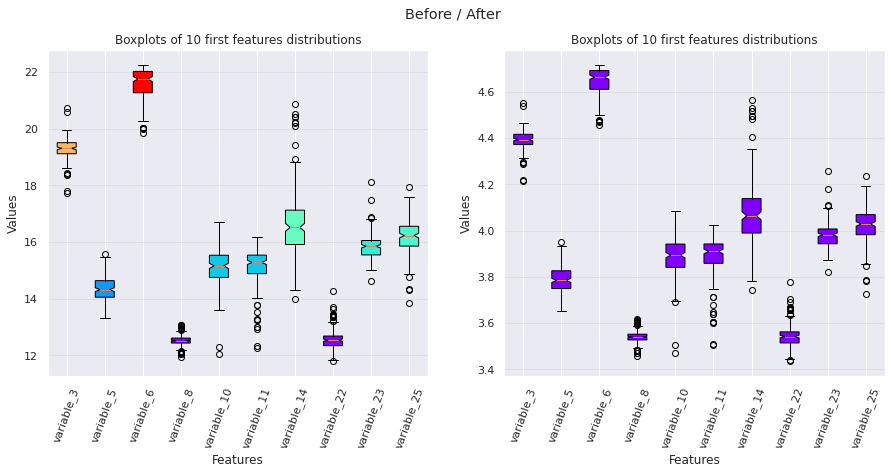

In [25]:
boxplot_first_distributions_metabolites_before_after(X_init=X, X_norm=normPeakTable(X, 'sqrt', based='metabolite'))

## Cubic root

In [26]:
normPeakTable(X, 'cbrt', based='metabolite')

,variable_3,variable_5,variable_6,variable_8,variable_10,variable_11,variable_14,variable_22,variable_23,variable_25,...,variable_2326,variable_2328,variable_2329,variable_2332,variable_2339,variable_2340,variable_2350,variable_2364,variable_2365,variable_2370
0,2.703598,2.446090,2.809896,2.327899,2.497630,2.513603,2.596291,2.338781,2.561443,2.561455,...,2.362986,2.344392,2.291825,2.371077,2.292747,2.325035,2.362905,2.305130,2.296676,2.311787
1,2.702388,2.476766,2.751522,2.323970,2.474156,2.412129,2.618496,2.323038,2.514988,2.464964,...,2.333151,2.335735,2.284940,2.379007,2.352562,2.347025,2.392646,2.327216,2.294635,2.302586
2,2.673825,2.490455,2.808503,2.321612,2.445703,2.483452,2.591526,2.338386,2.517066,2.532301,...,2.328088,2.319893,2.270778,2.334329,2.325619,2.322864,2.342847,2.296943,2.296131,2.314126
3,2.685929,2.491197,2.809212,2.334378,2.516539,2.518148,2.511254,2.321353,2.539181,2.573912,...,2.334369,2.324769,2.293740,2.375049,2.326455,2.321725,2.356557,2.295749,2.264051,2.309546
4,2.694178,2.439370,2.808404,2.309227,2.463480,2.482270,2.551475,2.302961,2.528827,2.525478,...,2.324807,2.311160,2.297532,2.335628,2.333584,2.321298,2.348690,2.311463,2.284728,2.313439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,2.699176,2.435573,2.750512,2.329938,2.455586,2.424115,2.577648,2.294550,2.487316,2.485393,...,2.322837,2.297366,2.293564,2.332262,2.311430,2.257506,2.362682,2.287128,2.295787,2.308451
182,2.682463,2.457409,2.762649,2.321455,2.437835,2.475124,2.562001,2.317860,2.544507,2.517393,...,2.376877,2.328758,2.312121,2.315225,2.345853,2.329558,2.328901,2.333648,2.318487,2.329123
183,2.676366,2.426767,2.775549,2.320767,2.434848,2.439651,2.536317,2.339727,2.499374,2.494541,...,2.364161,2.339165,2.281146,2.331885,2.342035,2.365919,2.351436,2.302055,2.294154,2.305729
184,2.662279,2.435164,2.757236,2.309122,2.416671,2.397240,2.525610,2.331110,2.520964,2.458496,...,2.317210,2.307846,2.291714,2.324156,2.319417,2.275955,2.347753,2.265532,2.296865,2.306163


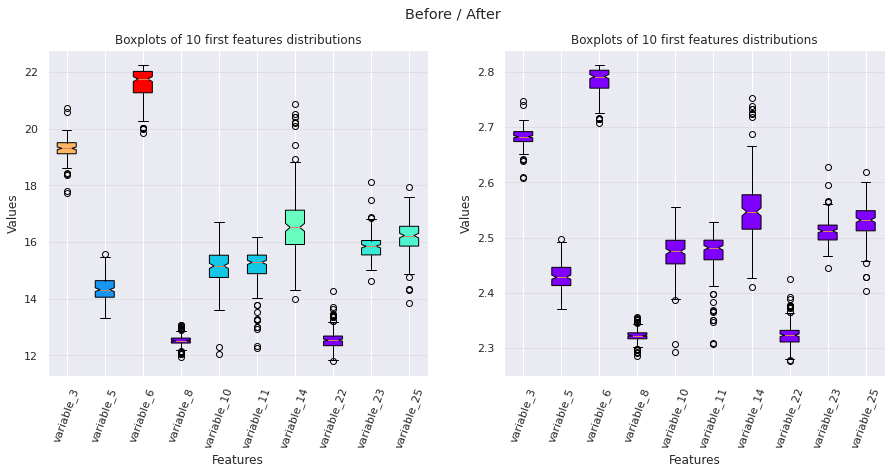

In [27]:
boxplot_first_distributions_metabolites_before_after(X_init=X, X_norm=normPeakTable(X, 'cbrt', based='metabolite'))

## Conclusion : For the transformation methods, the values for each features change, but not their relative positions (as seen above) and dispersion

# Metabolite-based Scaling Methods

### Each value in the peak table is transformed based on other values in the same column (feature/metabolite-based)

At this point, we want to __scale__ our peak table based on metabolite values

*Reminder : peak table of dimension $(n,p)$, rows = samples with iterator $i$, columns = features (metabolites) with iterator $j$*

Inspired by [this course](https://www.uab.edu/proteomics/metabolomics/workshop/2014/statistical%20analysis.pdf) and [this paper (NOREVA)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5570188/), here are all the Metabolite-based Normalization Methods available in this notebook :

<table>
  <tr>
    <th>Method</th>
    <th>Formula</th>
  </tr>
  <tr>
    <td>Range scaling</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{x_{j_{max}} - x_{j_{min}}}
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>Min-max scaling</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = \frac{x_{ij} - x_{j_{min}}}{x_{j_{max}} - x_{j_{min}}}
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>Maximum absolute scaling</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = \frac{x_{ij}}{x_{j_{max}}}
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>Level scaling</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{\bar{x}_j}
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>Robust scaling</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = \frac{x_{ij} - Q_2(x_j)}{Q_3(x_j) - Q_1(x_j)}
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>Autoscaling</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{s_j}
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>Pareto scaling</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{\sqrt{s_j}}
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>Vast scaling</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{s_j} \cdot \frac{\bar{x}_j}{s_j}
        \end{eqnarray}
    </td>
  </tr>
</table>

## Range scaling

\begin{eqnarray}
    \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{x_{j_{max}} - x_{j_{min}}}
\end{eqnarray}

In [28]:
normPeakTable(X, 'range_scaling', based='metabolites')

,variable_3,variable_5,variable_6,variable_8,variable_10,variable_11,variable_14,variable_22,variable_23,variable_25,...,variable_2326,variable_2328,variable_2329,variable_2332,variable_2339,variable_2340,variable_2350,variable_2364,variable_2365,variable_2370
0,0.675871,0.577259,0.973476,0.592800,0.760018,0.924653,0.510354,0.404393,0.624237,0.721177,...,0.854659,0.840271,0.466066,0.485732,0.177592,0.594254,0.474021,0.535128,0.475982,0.550078
1,0.666985,0.823965,0.406441,0.536948,0.666295,0.451298,0.576482,0.300838,0.368954,0.272474,...,0.548231,0.734246,0.376186,0.524796,0.689789,0.795382,0.623853,0.801534,0.446893,0.437001
2,0.459405,0.936051,0.959667,0.503510,0.555052,0.779922,0.496310,0.401776,0.380174,0.581963,...,0.497000,0.542221,0.193028,0.308095,0.455815,0.574599,0.375079,0.437674,0.468212,0.578968
3,0.546835,0.942163,0.966695,0.685329,0.836809,0.946776,0.267393,0.289843,0.500733,0.781635,...,0.560586,0.601050,0.491154,0.505269,0.462990,0.564306,0.442525,0.423507,0.017208,0.522451
4,0.606863,0.524031,0.958681,0.329011,0.624252,0.774317,0.380294,0.170806,0.444027,0.549840,...,0.463912,0.437488,0.540971,0.314282,0.524419,0.560444,0.403727,0.611004,0.306443,0.570473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,0.643418,0.494085,0.396848,0.621869,0.593400,0.505192,0.455698,0.116994,0.221298,0.364609,...,0.444099,0.273667,0.488851,0.298271,0.334750,0.000000,0.472914,0.321738,0.463304,0.508975
182,0.521718,0.667571,0.512699,0.501280,0.524741,0.740559,0.410435,0.267087,0.530087,0.512003,...,1.000000,0.649357,0.734152,0.217932,0.631019,0.635316,0.307278,0.880076,0.790039,0.765597
183,0.477692,0.424994,0.636953,0.491546,0.513286,0.575842,0.337325,0.410658,0.285237,0.406363,...,0.866882,0.776159,0.326895,0.296481,0.597726,0.971236,0.417243,0.498448,0.440041,0.475530
184,0.376745,0.490863,0.460906,0.327538,0.444179,0.385094,0.307279,0.353763,0.401269,0.243621,...,0.387678,0.397955,0.464604,0.259898,0.402711,0.158881,0.399127,0.070135,0.478669,0.480858


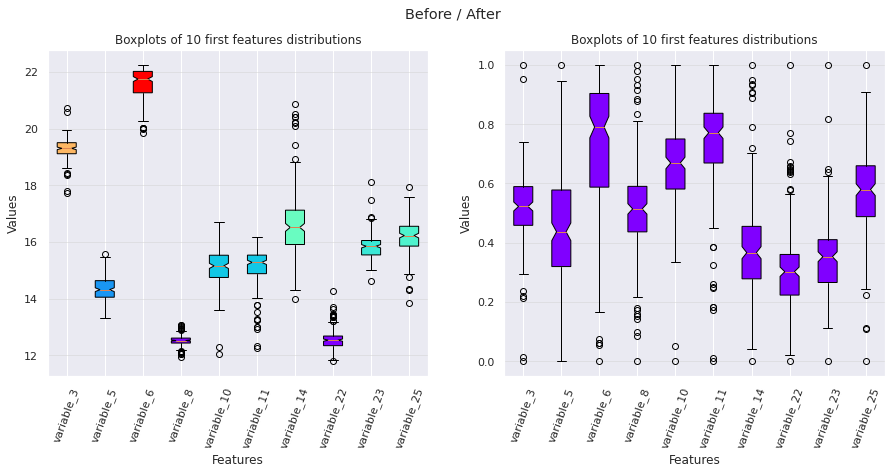

In [29]:
boxplot_first_distributions_metabolites_before_after(X_init=X, X_norm=normPeakTable(X, 'range_scaling', based='metabolite'))

## Mini-max scaling

\begin{eqnarray}
    \tilde{x}_{ij} = \frac{x_{ij} - x_{j_{min}}}{x_{j_{max}} - x_{j_{min}}}
\end{eqnarray}

_Use <code>MinMaxScaler()</code> function from <code>scikitlearn</code> package_

In [30]:
normPeakTable(X, 'minmax_scaling', based='metabolites')

,variable_3,variable_5,variable_6,variable_8,variable_10,variable_11,variable_14,variable_22,variable_23,variable_25,...,variable_2326,variable_2328,variable_2329,variable_2332,variable_2339,variable_2340,variable_2350,variable_2364,variable_2365,variable_2370
0,0.675871,0.577259,0.973476,0.592800,0.760018,0.924653,0.510354,0.404393,0.624237,0.721177,...,0.854659,0.840271,0.466066,0.485732,0.177592,0.594254,0.474021,0.535128,0.475982,0.550078
1,0.666985,0.823965,0.406441,0.536948,0.666295,0.451298,0.576482,0.300838,0.368954,0.272474,...,0.548231,0.734246,0.376186,0.524796,0.689789,0.795382,0.623853,0.801534,0.446893,0.437001
2,0.459405,0.936051,0.959667,0.503510,0.555052,0.779922,0.496310,0.401776,0.380174,0.581963,...,0.497000,0.542221,0.193028,0.308095,0.455815,0.574599,0.375079,0.437674,0.468212,0.578968
3,0.546835,0.942163,0.966695,0.685329,0.836809,0.946776,0.267393,0.289843,0.500733,0.781635,...,0.560586,0.601050,0.491154,0.505269,0.462990,0.564306,0.442525,0.423507,0.017208,0.522451
4,0.606863,0.524031,0.958681,0.329011,0.624252,0.774317,0.380294,0.170806,0.444027,0.549840,...,0.463912,0.437488,0.540971,0.314282,0.524419,0.560444,0.403727,0.611004,0.306443,0.570473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,0.643418,0.494085,0.396848,0.621869,0.593400,0.505192,0.455698,0.116994,0.221298,0.364609,...,0.444099,0.273667,0.488851,0.298271,0.334750,0.000000,0.472914,0.321738,0.463304,0.508975
182,0.521718,0.667571,0.512699,0.501280,0.524741,0.740559,0.410435,0.267087,0.530087,0.512003,...,1.000000,0.649357,0.734152,0.217932,0.631019,0.635316,0.307278,0.880076,0.790039,0.765597
183,0.477692,0.424994,0.636953,0.491546,0.513286,0.575842,0.337325,0.410658,0.285237,0.406363,...,0.866882,0.776159,0.326895,0.296481,0.597726,0.971236,0.417243,0.498448,0.440041,0.475530
184,0.376745,0.490863,0.460906,0.327538,0.444179,0.385094,0.307279,0.353763,0.401269,0.243621,...,0.387678,0.397955,0.464604,0.259898,0.402711,0.158881,0.399127,0.070135,0.478669,0.480858


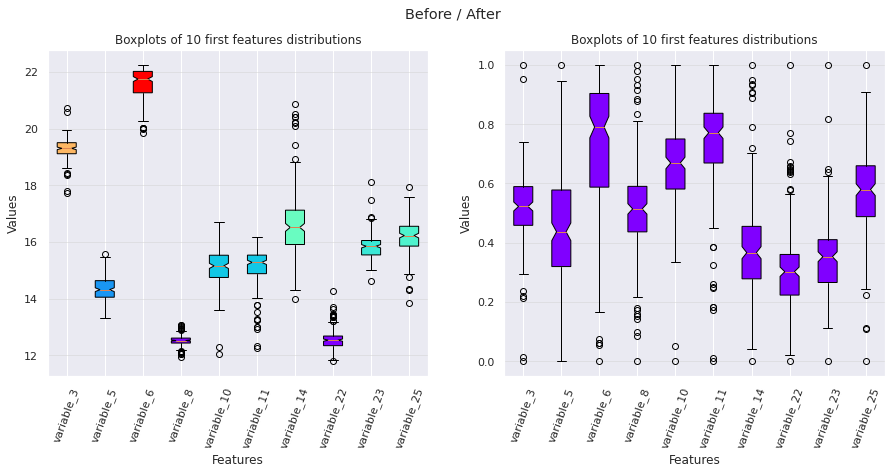

In [31]:
boxplot_first_distributions_metabolites_before_after(X_init=X, X_norm=normPeakTable(X, 'minmax_scaling', based='metabolite'))

## Maximum absolute scaling

\begin{eqnarray}
    \tilde{x}_{ij} = \frac{x_{ij}}{x_{j_{max}}}
\end{eqnarray}

In [32]:
normPeakTable(X, 'max_abs_scaling', based='metabolites')

,variable_3,variable_5,variable_6,variable_8,variable_10,variable_11,variable_14,variable_22,variable_23,variable_25,...,variable_2326,variable_2328,variable_2329,variable_2332,variable_2339,variable_2340,variable_2350,variable_2364,variable_2365,variable_2370
0,0.953356,0.938722,0.997153,0.964462,0.933255,0.981826,0.839199,0.896563,0.927091,0.936669,...,0.982570,0.983646,0.949322,0.882978,0.885759,0.945375,0.881654,0.951800,0.954208,0.954818
1,0.952078,0.974483,0.936289,0.959588,0.907188,0.867654,0.860915,0.878579,0.877558,0.834752,...,0.945820,0.972790,0.940791,0.891866,0.956908,0.972452,0.915366,0.979422,0.951666,0.943463
2,0.922206,0.990730,0.995671,0.956670,0.876249,0.946918,0.834587,0.896108,0.879735,0.905048,...,0.939676,0.953130,0.923407,0.842556,0.924407,0.942729,0.859391,0.941696,0.953529,0.957720
3,0.934787,0.991616,0.996425,0.972538,0.954612,0.987162,0.759410,0.876669,0.903127,0.950401,...,0.947302,0.959153,0.951703,0.887423,0.925404,0.941343,0.874567,0.940227,0.914118,0.952044
4,0.943426,0.931006,0.995565,0.941441,0.895495,0.945566,0.796487,0.855996,0.892125,0.897752,...,0.935708,0.942406,0.956432,0.843964,0.933937,0.940823,0.865837,0.959668,0.939393,0.956867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,0.948686,0.926665,0.935259,0.966999,0.886914,0.880653,0.821250,0.846651,0.848909,0.855679,...,0.933332,0.925633,0.951485,0.840320,0.907590,0.865371,0.881404,0.929675,0.953100,0.950691
182,0.931173,0.951813,0.947694,0.956475,0.867818,0.937423,0.806385,0.872717,0.908823,0.889158,...,1.000000,0.964099,0.974767,0.822039,0.948745,0.950903,0.844136,0.987566,0.981652,0.976461
183,0.924837,0.916650,0.961031,0.955625,0.864632,0.897694,0.782376,0.897651,0.861315,0.865163,...,0.984035,0.977082,0.936113,0.839913,0.944120,0.996128,0.868878,0.947997,0.951067,0.947332
184,0.910310,0.926198,0.942135,0.941312,0.845412,0.851686,0.772508,0.887770,0.883828,0.828198,...,0.926565,0.938359,0.949183,0.831589,0.917030,0.886761,0.864802,0.903588,0.954443,0.947867


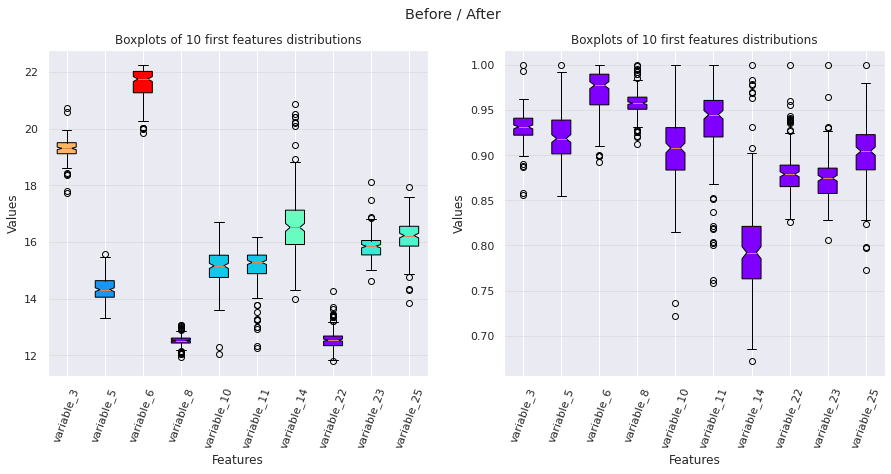

In [33]:
boxplot_first_distributions_metabolites_before_after(X_init=X, X_norm=normPeakTable(X, 'max_abs_scaling', based='metabolite'))

## Level scaling

\begin{eqnarray}
    \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{\bar{x}_j}
\end{eqnarray}

In [34]:
normPeakTable(X, 'level_scaling', based='metabolites')

,variable_3,variable_5,variable_6,variable_8,variable_10,variable_11,variable_14,variable_22,variable_23,variable_25,...,variable_2326,variable_2328,variable_2329,variable_2332,variable_2339,variable_2340,variable_2350,variable_2364,variable_2365,variable_2370
0,0.024406,0.019461,0.027255,0.007423,0.030731,0.049088,0.050359,0.019561,0.061204,0.038605,...,0.035051,0.027663,-0.004652,0.031100,-0.052996,0.008261,0.019041,0.004753,0.002662,0.004258
1,0.023032,0.058298,-0.035447,0.002331,0.001941,-0.072906,0.077539,-0.000891,0.004506,-0.074404,...,-0.003662,0.016322,-0.013597,0.041480,0.023073,0.037140,0.058006,0.033912,-0.000009,-0.007685
2,-0.009066,0.075943,0.025728,-0.000717,-0.032230,0.011788,0.044586,0.019044,0.006998,0.003543,...,-0.010134,-0.004219,-0.031824,-0.016103,-0.011676,0.005439,-0.006691,-0.005913,0.001948,0.007309
3,0.004453,0.076905,0.026506,0.015857,0.054319,0.054790,-0.049507,-0.003062,0.033774,0.053831,...,-0.002101,0.002074,-0.002156,0.036291,-0.010610,0.003961,0.010849,-0.007464,-0.039464,0.001340
4,0.013735,0.011081,0.025619,-0.016625,-0.010973,0.010343,-0.003101,-0.026571,0.021180,-0.004547,...,-0.014314,-0.015422,0.002802,-0.014459,-0.001487,0.003407,0.000760,0.013058,-0.012906,0.006412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,0.019388,0.006367,-0.036507,0.010072,-0.020450,-0.059016,0.027893,-0.037198,-0.028288,-0.051199,...,-0.016817,-0.032946,-0.002385,-0.018713,-0.029656,-0.077064,0.018753,-0.018603,0.001498,-0.000083
182,0.000569,0.033678,-0.023697,-0.000921,-0.041541,0.001643,0.009288,-0.007556,0.040294,-0.014077,...,0.053412,0.007241,0.022027,-0.040062,0.014345,0.014157,-0.024323,0.042508,0.031499,0.027021
183,-0.006238,-0.004509,-0.009957,-0.001808,-0.045059,-0.040808,-0.020763,0.020798,-0.014087,-0.040683,...,0.036595,0.020805,-0.018502,-0.019189,0.009400,0.062390,0.004275,0.000738,-0.000638,-0.003616
184,-0.021848,0.005860,-0.029424,-0.016759,-0.066287,-0.089968,-0.033113,0.009562,0.011683,-0.081671,...,-0.023945,-0.019651,-0.004798,-0.028910,-0.019563,-0.054252,-0.000437,-0.046141,0.002908,-0.003053


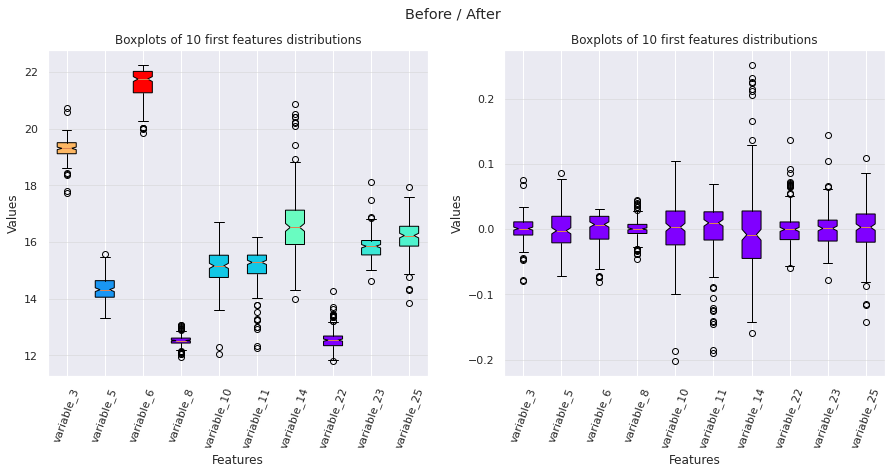

In [35]:
boxplot_first_distributions_metabolites_before_after(X_init=X, X_norm=normPeakTable(X, 'level_scaling', based='metabolite'))

## Robust scaling

\begin{eqnarray}
    \tilde{x}_{ij} = \frac{x_{ij} - Q_2(x_j)}{Q_3(x_j) - Q_1(x_j)}
\end{eqnarray}

_Use <code>RobustScaler()</code> function from <code>scikitlearn</code> package_

In [36]:
normPeakTable(X, 'robust_scaling', based='metabolites')

,variable_3,variable_5,variable_6,variable_8,variable_10,variable_11,variable_14,variable_22,variable_23,variable_25,...,variable_2326,variable_2328,variable_2329,variable_2332,variable_2339,variable_2340,variable_2350,variable_2364,variable_2365,variable_2370
0,1.175611,0.542886,0.580025,0.511877,0.538265,0.915837,0.812829,0.745318,1.877818,0.827348,...,1.081070,1.039402,-0.491689,0.614220,-1.897012,0.358760,0.407944,0.193205,0.196492,0.214563
1,1.107530,1.498139,-1.215044,0.147898,-0.016752,-1.905796,1.186676,-0.010454,0.110992,-1.788375,...,-0.145030,0.612555,-1.504789,0.751916,0.848300,1.699684,1.042965,1.162091,-0.047895,-0.423024
2,-0.482908,1.932139,0.536310,-0.070015,-0.675524,0.053106,0.733431,0.726217,0.188644,0.015800,...,-0.350020,-0.160514,-3.569275,-0.011944,-0.405771,0.227723,-0.011391,-0.161226,0.131216,0.377463
3,0.186961,1.955802,0.558559,1.114871,0.993018,1.047710,-0.560731,-0.090698,1.023040,1.179792,...,-0.095595,0.076325,-0.208902,0.683085,-0.367316,0.159095,0.274457,-0.212749,-3.657764,0.058788
4,0.646888,0.336785,0.533187,-1.207198,-0.265730,0.019697,0.077546,-0.959459,0.630575,-0.171462,...,-0.482415,-0.582157,0.352612,0.009865,-0.038066,0.133350,0.110023,0.469157,-1.227842,0.329564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,0.926959,0.220834,-1.245414,0.701315,-0.448429,-1.584543,0.503833,-1.352190,-0.910938,-1.251274,...,-0.561691,-1.241680,-0.234870,-0.046573,-1.054666,-3.603140,0.403253,-0.582872,0.089983,-0.017196
182,-0.005477,0.892575,-0.878662,-0.084549,-0.855023,-0.181536,0.247943,-0.256776,1.226200,-0.392035,...,1.662616,0.270801,2.530083,-0.329765,0.533300,0.632521,-0.298749,1.447739,2.834946,1.429777
183,-0.342795,-0.046688,-0.485310,-0.147986,-0.922859,-1.163401,-0.165381,0.791040,-0.468416,-1.007863,...,1.129974,0.781291,-2.060381,-0.052881,0.354854,2.872105,0.167309,0.059801,-0.105455,-0.205779
184,-1.116232,0.208358,-1.042624,-1.216795,-1.332106,-2.300437,-0.335242,0.375803,0.334643,-1.956575,...,-0.787446,-0.741313,-0.508167,-0.181835,-0.690406,-2.543881,0.090526,-1.497922,0.219068,-0.175734


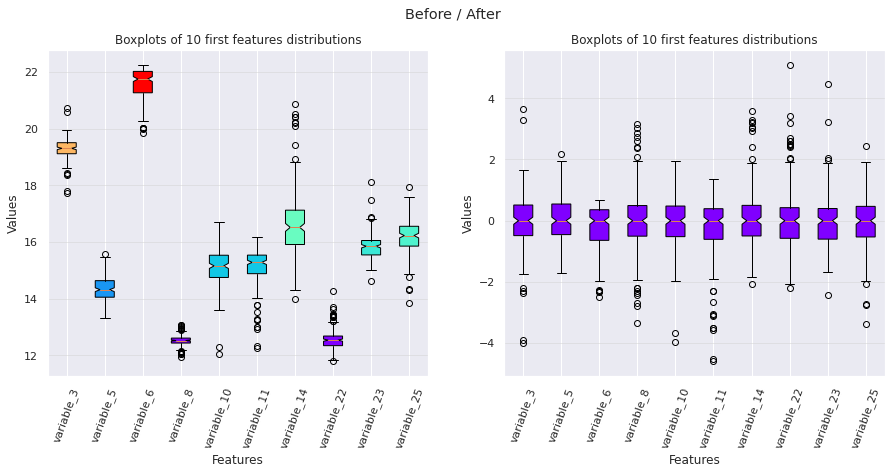

In [37]:
boxplot_first_distributions_metabolites_before_after(X_init=X, X_norm=normPeakTable(X, 'robust_scaling', based='metabolite'))

## Autoscaling

\begin{eqnarray}
    \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{s_j}
\end{eqnarray}

_Use <code>StandardScaler()</code> function from <code>scikitlearn</code> package_

In [38]:
normPeakTable(X, 'autoscaling', based='metabolites')

,variable_3,variable_5,variable_6,variable_8,variable_10,variable_11,variable_14,variable_22,variable_23,variable_25,...,variable_2326,variable_2328,variable_2329,variable_2332,variable_2339,variable_2340,variable_2350,variable_2364,variable_2365,variable_2370
0,1.295652,0.632609,1.136937,0.491837,0.700111,1.092516,0.714599,0.641404,2.321801,1.052916,...,1.571243,1.404833,-0.316430,0.596125,-2.139014,0.383753,0.426207,0.211554,0.166776,0.230073
1,1.222709,1.895083,-1.478628,0.154460,0.044229,-1.622608,1.100300,-0.029205,0.170951,-2.029319,...,-0.164137,0.828873,-0.924800,0.795092,0.931259,1.725207,1.298430,1.509331,-0.000587,-0.415268
2,-0.481291,2.468662,1.073241,-0.047527,-0.734264,0.262351,0.632683,0.624456,0.265481,0.096629,...,-0.454273,-0.214255,-2.164531,-0.308668,-0.471255,0.252664,-0.149764,-0.263189,0.122073,0.394954
3,0.236408,2.499935,1.105659,1.050760,1.237508,1.219411,-0.702515,-0.100407,1.281236,1.468219,...,-0.094168,0.105320,-0.146615,0.695633,-0.428248,0.184009,0.242858,-0.332202,-2.472727,0.072403
4,0.729176,0.360223,1.068691,-1.101597,-0.249997,0.230203,-0.043998,-0.871274,0.803467,-0.124030,...,-0.641659,-0.783193,0.190576,-0.277154,-0.060026,0.158254,0.017002,0.581179,-0.808648,0.346472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,1.029246,0.206981,-1.522879,0.667430,-0.465898,-1.313481,0.395805,-1.219752,-1.073098,-1.396426,...,-0.753864,-1.673111,-0.162209,-0.358705,-1.196959,-3.579713,0.419763,-0.827964,0.093836,-0.004505
182,0.030230,1.094762,-0.988490,-0.060999,-0.946385,0.036566,0.131801,-0.247771,1.528553,-0.383942,...,2.394343,0.367733,1.498155,-0.767912,0.578974,0.657622,-0.544460,1.891943,1.973664,1.460066
183,-0.331174,-0.146579,-0.415344,-0.119799,-1.026548,-0.908236,-0.294629,0.681974,-0.534393,-1.109603,...,1.640460,1.056555,-1.258435,-0.367820,0.379404,2.898091,0.095686,0.032865,-0.040005,-0.195381
184,-1.159837,0.190493,-1.227397,-1.110493,-1.510169,-2.002352,-0.469875,0.313527,0.443213,-2.227517,...,-1.073390,-0.997947,-0.326325,-0.554156,-0.789582,-2.520035,-0.009777,-2.053630,0.182237,-0.164971


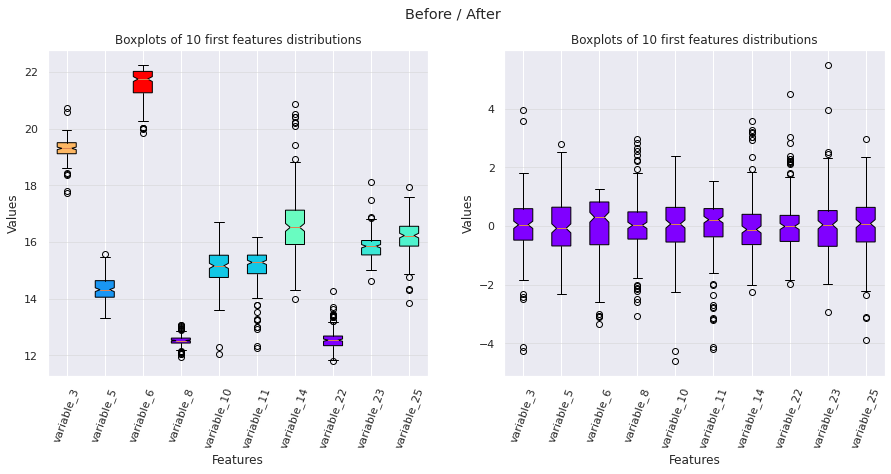

In [39]:
boxplot_first_distributions_metabolites_before_after(X_init=X, X_norm=normPeakTable(X, 'autoscaling', based='metabolite'))

## Pareto scaling

\begin{eqnarray}
    \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{\sqrt{s_j}}
\end{eqnarray}

In [40]:
normPeakTable(X, 'pareto_scaling', based='metabolites')

,variable_3,variable_5,variable_6,variable_8,variable_10,variable_11,variable_14,variable_22,variable_23,variable_25,...,variable_2326,variable_2328,variable_2329,variable_2332,variable_2339,variable_2340,variable_2350,variable_2364,variable_2365,variable_2370
0,0.781034,0.420408,0.818069,0.213810,0.570281,0.901034,0.774335,0.396768,1.500139,0.811001,...,0.837880,0.698041,-0.133431,0.489569,-1.201125,0.198798,0.324133,0.110718,0.073236,0.109782
1,0.737064,1.259401,-1.063928,0.067146,0.036027,-1.338218,1.192279,-0.018066,0.110453,-1.563069,...,-0.087528,0.411855,-0.389966,0.652972,0.522932,0.893720,0.987463,0.789916,-0.000258,-0.198150
2,-0.290128,1.640580,0.772237,-0.020661,-0.598100,0.216370,0.685572,0.386283,0.171530,0.074428,...,-0.242246,-0.106460,-0.912732,-0.253494,-0.264625,0.130889,-0.113897,-0.137742,0.053605,0.188457
3,0.142510,1.661363,0.795564,0.456782,1.008022,1.005688,-0.761241,-0.062111,0.827819,1.130885,...,-0.050216,0.052332,-0.061824,0.571290,-0.240475,0.095323,0.184695,-0.173860,-1.085834,0.034548
4,0.439556,0.239390,0.768964,-0.478882,-0.203637,0.189856,-0.047676,-0.538963,0.519128,-0.095533,...,-0.342171,-0.389157,0.080361,-0.227613,-0.033706,0.081981,0.012930,0.304163,-0.355097,0.165323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,0.620441,0.137552,-1.095769,0.290142,-0.379501,-1.083271,0.428892,-0.754528,-0.693339,-1.075587,...,-0.402005,-0.831345,-0.068400,-0.294587,-0.672131,-1.854422,0.319232,-0.433320,0.041206,-0.002149
182,0.018223,0.727538,-0.711256,-0.026517,-0.770885,0.030157,0.142819,-0.153269,0.987613,-0.295729,...,1.276806,0.182721,0.631737,-0.630649,0.325112,0.340672,-0.414065,0.990159,0.866684,0.696687
183,-0.199636,-0.097411,-0.298856,-0.052079,-0.836182,-0.749052,-0.319258,0.421863,-0.345276,-0.854664,...,0.874791,0.524987,-0.530652,-0.302073,0.213048,1.501317,0.072770,0.017200,-0.017567,-0.093228
184,-0.699163,0.126594,-0.883158,-0.482749,-1.230120,-1.651405,-0.509154,0.193945,0.286364,-1.715729,...,-0.572395,-0.495866,-0.137603,-0.455102,-0.443376,-1.305470,-0.007436,-1.074779,0.080025,-0.078718


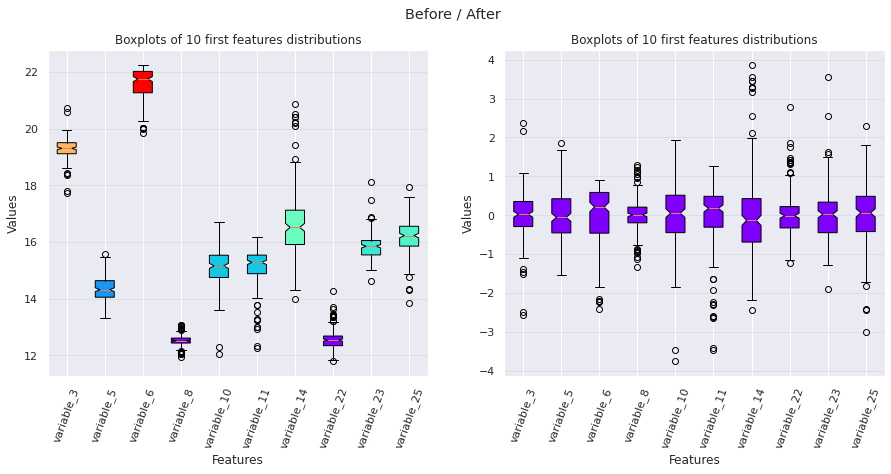

In [41]:
boxplot_first_distributions_metabolites_before_after(X_init=X, X_norm=normPeakTable(X, 'pareto_scaling', based='metabolite'))

## Vast scaling

\begin{eqnarray}
    \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{s_j} \cdot \frac{\bar{x}_j}{s_j}
\end{eqnarray}

In [42]:
normPeakTable(X, 'vast_scaling', based='metabolites')

,variable_3,variable_5,variable_6,variable_8,variable_10,variable_11,variable_14,variable_22,variable_23,variable_25,...,variable_2326,variable_2328,variable_2329,variable_2332,variable_2339,variable_2340,variable_2350,variable_2364,variable_2365,variable_2370
0,68.782701,20.564141,47.426593,32.590465,15.950073,24.315289,10.140331,21.031929,88.077944,28.717624,...,70.434927,71.343078,-21.522276,11.426681,-86.333844,17.825683,9.540329,9.415719,10.449730,12.431764
1,64.910347,61.603259,-61.679968,10.234913,1.007629,-36.113126,15.613520,-0.957658,6.485050,-55.348382,...,-7.357846,42.093529,-62.901180,15.240549,37.587030,80.137505,29.064353,67.176518,-0.036781,-22.438643
2,-25.550457,80.248554,44.769531,-3.149259,-16.728144,5.838947,8.977926,20.476169,10.071060,2.635505,...,-20.363944,-10.880758,-147.222699,-5.916626,-19.020578,11.736482,-3.352359,-11.713904,7.648761,21.340979
3,12.550287,81.265149,46.121848,69.626180,28.193157,27.139489,-9.968853,-3.292399,48.603908,40.044744,...,-4.221314,5.348593,-9.972193,13.334083,-17.284756,8.547394,5.436182,-14.785486,-154.933951,3.912241
4,38.709977,11.709721,44.579743,-72.994811,-5.695471,5.123446,-0.624348,-28.569459,30.479662,-3.382835,...,-28.763997,-39.773700,12.962223,-5.312564,-2.422721,7.351060,0.380567,25.866806,-50.667527,18.721302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,54.639879,6.728322,-63.525896,44.225698,-10.614179,-29.233130,5.616572,-39.996187,-40.708171,-38.086616,...,-33.793857,-84.967334,-11.032812,-6.875755,-48.311088,-166.281072,9.396078,-36.850614,5.879511,-0.243401
182,1.604846,35.587330,-41.234199,-4.041933,-21.560717,0.813813,1.870287,-8.124535,57.985929,-10.471778,...,107.332473,18.674963,101.898466,-14.719538,23.368254,30.547157,-12.187312,84.205616,123.664108,78.893294
183,-17.581147,-4.764842,-17.325819,-7.938209,-23.387017,-20.213897,-4.180849,22.362215,-20.272283,-30.263716,...,73.537765,53.656118,-85.593695,-7.050475,15.313325,134.619080,2.141868,1.462758,-2.506607,-10.557214
184,-61.572618,6.192326,-51.200038,-73.584275,-34.404971,-44.564801,-6.667642,10.280675,16.813366,-60.754110,...,-48.117408,-50.679799,-22.195303,-10.622215,-31.868742,-117.058035,-0.218857,-91.401942,11.418449,-8.914067


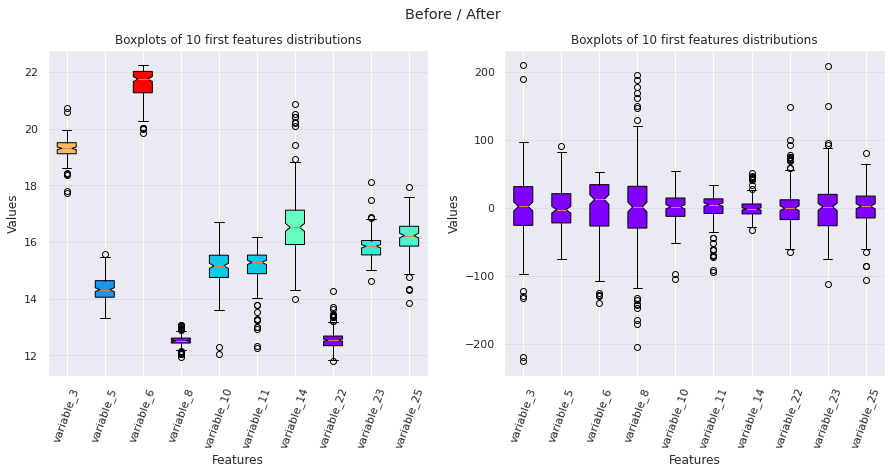

In [43]:
boxplot_first_distributions_metabolites_before_after(X_init=X, X_norm=normPeakTable(X, 'vast_scaling', based='metabolite'))

## Conclusion : For the scaling methods, the point is to align the mean of each feature on the same value and/or make all the values part of the same range (e.g. same min and/or max)

# Sample-based Normalisation Methods

### Scaling : Each value in the peak table is transformed based on other values in the same row (sample-based)

At this point, we want to __normalise__ our peak table based on metabolite values

*Reminder : peak table of dimension $(n,p)$, rows = samples with iterator $i$, columns = features (metabolites) with iterator $j$*

Inspired by [this course](https://www.uab.edu/proteomics/metabolomics/workshop/2014/statistical%20analysis.pdf) and [this paper (NOREVA)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5570188/), here are all the Metabolite-based Normalization Methods available in this notebook :

<table>
  <tr>
    <th>Method</th>
    <th>Formula</th>
  </tr>
  <tr>
    <td>Mean normalisation</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = x_{ij} - \bar{x}_i
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>Median normalisation</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = x_{ij} - Q_2(x_i)
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>L1 normalisation</td>
    <td>
        \begin{eqnarray}
             \sum_{i=1}^p x_{ni} = 1
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>L2 normalisation</td>
    <td>
        \begin{eqnarray}
            \sqrt{\sum_{i=1}^p x_{ni} ^2} = 1
        \end{eqnarray}
    </td>
  </tr>
</table>

## Mean normalisation

\begin{eqnarray}
    \tilde{x}_{ij} = x_{ij} - \bar{x}_i
\end{eqnarray}

In [44]:
normPeakTable(X, 'mean_normalisation', based='samples')

,variable_3,variable_5,variable_6,variable_8,variable_10,variable_11,variable_14,variable_22,variable_23,variable_25,...,variable_2326,variable_2328,variable_2329,variable_2332,variable_2339,variable_2340,variable_2350,variable_2364,variable_2365,variable_2370
0,4.881210,-0.244742,7.305006,-2.265432,0.700028,1.000861,2.620323,-2.087683,1.925028,1.925266,...,-1.686360,-1.995395,-2.842849,-1.550368,-2.828323,-2.311928,-1.687727,-2.631986,-2.766247,-2.525558
1,4.918386,0.376503,6.014521,-2.265507,0.328530,-0.782240,3.136886,-2.280613,1.090821,0.160338,...,-2.116159,-2.073914,-2.887341,-1.352490,-1.796528,-1.888251,-1.119579,-2.212841,-2.734837,-2.608809
2,4.407518,0.738156,7.444046,-2.195343,-0.079668,0.608214,2.696157,-1.922151,1.238618,1.529944,...,-2.090329,-2.223122,-2.999444,-1.988593,-2.130431,-2.175090,-1.848834,-2.590001,-2.602850,-2.316000
3,4.580274,0.663924,7.372788,-2.075834,1.140568,1.171148,1.040356,-2.287567,1.574610,2.255630,...,-2.075970,-2.232263,-2.728679,-1.399279,-2.204913,-2.281557,-1.709796,-2.696946,-3.191248,-2.477482
4,4.925644,-0.114758,7.519955,-2.316275,0.319910,0.664612,1.979878,-2.416236,1.541469,1.477297,...,-2.065351,-2.285326,-2.502415,-1.889074,-1.922499,-2.122162,-1.674117,-2.280463,-2.704056,-2.248774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,5.062511,-0.154608,6.206037,-1.954140,0.204485,-0.357550,2.524112,-2.521756,0.785909,0.750244,...,-2.069431,-2.477215,-2.537317,-1.916249,-2.253167,-3.097462,-1.413345,-2.638602,-2.502203,-2.300858
182,4.626949,0.164935,6.410170,-2.164336,-0.186858,0.488191,2.141586,-2.222361,1.799451,1.278386,...,-1.246728,-2.045879,-2.314625,-2.264779,-1.765722,-2.032862,-2.043560,-1.966155,-2.212255,-2.039939
183,4.648672,-0.230243,6.859959,-2.022396,-0.086995,-0.001396,1.793934,-1.713537,1.091309,1.000922,...,-1.308055,-1.722761,-2.651725,-1.841884,-1.675598,-1.278554,-1.520268,-2.322307,-2.447499,-2.263805
184,4.354193,-0.074736,6.446173,-2.202974,-0.401238,-0.738954,1.594805,-1.847884,1.506060,0.344334,...,-2.073139,-2.223366,-2.479344,-1.960918,-2.037559,-2.725931,-1.574624,-2.887158,-2.398002,-2.250239


In [45]:
normPeakTable(X, 'mean_normalisation', based='samples').mean(axis=1).round()

0      0.0
1      0.0
2     -0.0
3     -0.0
4      0.0
      ... 
181    0.0
182    0.0
183    0.0
184    0.0
185    0.0
Length: 186, dtype: float64

All rows (samples) have a __mean value equal to 0__

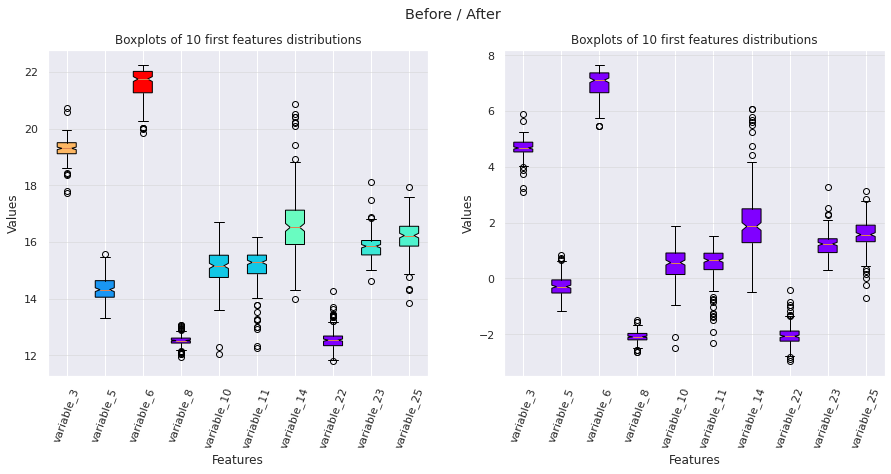

In [46]:
boxplot_first_distributions_metabolites_before_after(X_init=X, X_norm=normPeakTable(X, 'mean_normalisation', based='samples'))

## Median normalisation

\begin{eqnarray}
    \tilde{x}_{ij} = x_{ij} - Q_2(x_i)
\end{eqnarray}

In [47]:
normPeakTable(X, 'median_normalisation', based='samples')

,variable_3,variable_5,variable_6,variable_8,variable_10,variable_11,variable_14,variable_22,variable_23,variable_25,...,variable_2326,variable_2328,variable_2329,variable_2332,variable_2339,variable_2340,variable_2350,variable_2364,variable_2365,variable_2370
0,5.588420,0.462468,8.012217,-1.558222,1.407238,1.708072,3.327533,-1.380473,2.632238,2.632476,...,-0.979150,-1.288185,-2.135638,-0.843158,-2.121113,-1.604718,-0.980517,-1.924776,-2.059037,-1.818348
1,5.700626,1.158743,6.796761,-1.483267,1.110770,0.000000,3.919126,-1.498374,1.873061,0.942578,...,-1.333920,-1.291674,-2.105101,-0.570251,-1.014288,-1.106011,-0.337339,-1.430601,-1.952598,-1.826569
2,5.255649,1.586287,8.292177,-1.347212,0.768463,1.456345,3.544288,-1.074020,2.086749,2.378075,...,-1.242198,-1.374991,-2.151313,-1.140462,-1.282300,-1.326959,-1.000703,-1.741870,-1.754719,-1.467869
3,5.351675,1.435326,8.144189,-1.304432,1.911969,1.942549,1.811757,-1.516166,2.346012,3.027031,...,-1.304569,-1.460862,-1.957278,-0.627878,-1.433512,-1.510156,-0.938395,-1.925545,-2.419847,-1.706081
4,5.582374,0.541972,8.176684,-1.659545,0.976639,1.321341,2.636607,-1.759507,2.198199,2.134026,...,-1.408622,-1.628596,-1.845686,-1.232344,-1.265769,-1.465432,-1.017388,-1.623734,-2.047327,-1.592045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,5.843560,0.626440,6.987085,-1.173092,0.985534,0.423498,3.305160,-1.740708,1.566958,1.531293,...,-1.288383,-1.696167,-1.756269,-1.135201,-1.472119,-2.316414,-0.632297,-1.857553,-1.721155,-1.519810
182,5.389483,0.927470,7.172704,-1.401801,0.575676,1.250726,2.904120,-1.459827,2.561985,2.040920,...,-0.484193,-1.283345,-1.552090,-1.502245,-1.003188,-1.270327,-1.281026,-1.203621,-1.449720,-1.277405
183,5.387474,0.508558,7.598760,-1.283595,0.651806,0.737406,2.532735,-0.974735,1.830111,1.739723,...,-0.569253,-0.983959,-1.912924,-1.103082,-0.936797,-0.539752,-0.781467,-1.583505,-1.708697,-1.525003
184,5.142253,0.713324,7.234233,-1.414914,0.386822,0.049105,2.382865,-1.059824,2.294120,1.132393,...,-1.285079,-1.435306,-1.691284,-1.172858,-1.249500,-1.937871,-0.786564,-2.099099,-1.609943,-1.462180


In [48]:
normPeakTable(X, 'median_normalisation', based='samples').median(axis=1)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
181    0.0
182    0.0
183    0.0
184    0.0
185    0.0
Length: 186, dtype: float64

All rows (samples) have a __median value equal to 0__

In [61]:
row_medians = np.median(X, axis=1)
row_medians = np.array(row_medians).reshape((row_medians.shape[0], 1))
print(f'Median :\n{(X - row_medians).median(axis=1)}\n')
print(f'Mean :\n{(X - row_medians).mean(axis=1)}')

Median :
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
181    0.0
182    0.0
183    0.0
184    0.0
185    0.0
Length: 186, dtype: float64

Mean :
0      0.707210
1      0.782240
2      0.848131
3      0.771401
4      0.656729
         ...   
181    0.781048
182    0.762534
183    0.738802
184    0.788060
185    0.705244
Length: 186, dtype: float64


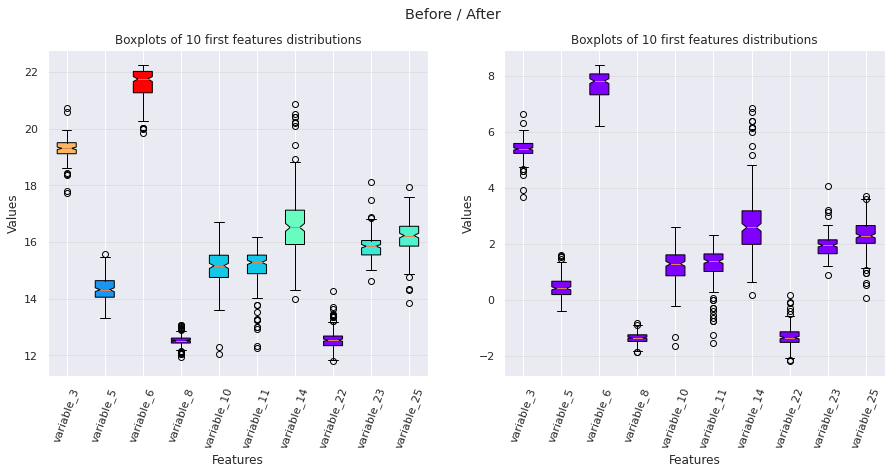

In [62]:
boxplot_first_distributions_metabolites_before_after(X_init=X, X_norm=normPeakTable(X, 'median_normalisation', based='samples'))

## L1 normalisation

After this normalisation, for each sample n, index of metabolites = $\{1,p\}$, the transformed peak table verify :

\begin{eqnarray}
     \sum_{i=1}^p x_{ni} = 1
\end{eqnarray}

In [63]:
normPeakTable(X, 'l1_normalisation', based='samples')

,variable_3,variable_5,variable_6,variable_8,variable_10,variable_11,variable_14,variable_22,variable_23,variable_25,...,variable_2326,variable_2328,variable_2329,variable_2332,variable_2339,variable_2340,variable_2350,variable_2364,variable_2365,variable_2370
0,0.003941,0.002919,0.004424,0.002516,0.003107,0.003167,0.003490,0.002551,0.003351,0.003351,...,0.002631,0.002569,0.002400,0.002658,0.002403,0.002506,0.002631,0.002443,0.002416,0.002464
1,0.003952,0.003043,0.004172,0.002514,0.003033,0.002811,0.003596,0.002511,0.003186,0.002999,...,0.002544,0.002552,0.002389,0.002696,0.002608,0.002589,0.002743,0.002524,0.002420,0.002445
2,0.003857,0.003116,0.004469,0.002524,0.002951,0.003090,0.003511,0.002580,0.003217,0.003276,...,0.002546,0.002519,0.002362,0.002566,0.002538,0.002529,0.002594,0.002445,0.002442,0.002500
3,0.003886,0.003101,0.004446,0.002551,0.003196,0.003202,0.003176,0.002509,0.003283,0.003420,...,0.002551,0.002520,0.002420,0.002687,0.002525,0.002510,0.002624,0.002427,0.002327,0.002471
4,0.003966,0.002944,0.004493,0.002498,0.003032,0.003102,0.003369,0.002477,0.003280,0.003267,...,0.002548,0.002504,0.002460,0.002584,0.002577,0.002537,0.002628,0.002505,0.002419,0.002511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,0.003996,0.002936,0.004228,0.002570,0.003009,0.002895,0.003480,0.002455,0.003127,0.003120,...,0.002547,0.002464,0.002452,0.002578,0.002509,0.002338,0.002680,0.002431,0.002459,0.002500
182,0.003903,0.003001,0.004264,0.002530,0.002930,0.003066,0.003400,0.002518,0.003331,0.003226,...,0.002715,0.002554,0.002499,0.002509,0.002610,0.002556,0.002554,0.002570,0.002520,0.002555
183,0.003917,0.002920,0.004369,0.002554,0.002950,0.002967,0.003334,0.002617,0.003190,0.003172,...,0.002700,0.002615,0.002426,0.002591,0.002625,0.002706,0.002657,0.002493,0.002467,0.002505
184,0.003857,0.002952,0.004285,0.002517,0.002885,0.002816,0.003293,0.002590,0.003275,0.003038,...,0.002544,0.002513,0.002461,0.002566,0.002551,0.002410,0.002645,0.002377,0.002477,0.002507


In [64]:
normPeakTable(X, 'l1_normalisation', based='samples').sum(axis=1)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
181    1.0
182    1.0
183    1.0
184    1.0
185    1.0
Length: 186, dtype: float64

After this normalisation, the __sum of all values in a row (sample) equals 1__

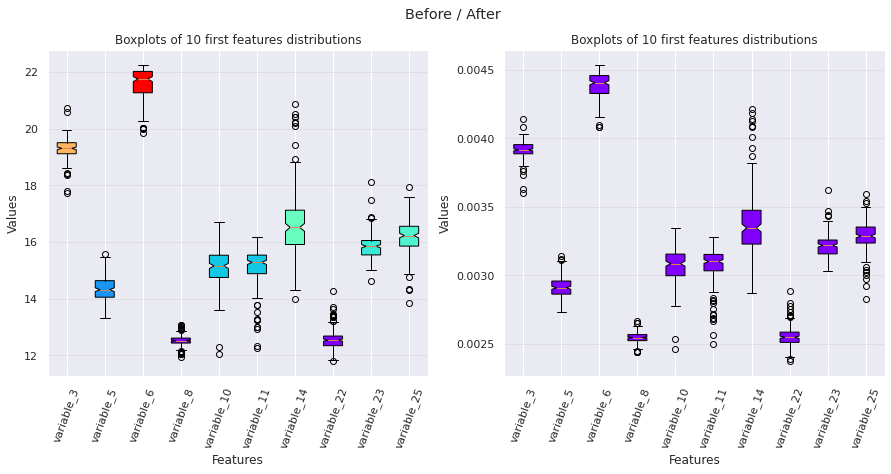

In [65]:
boxplot_first_distributions_metabolites_before_after(X_init=X, X_norm=normPeakTable(X, 'l1_normalisation', based='samples'))

## L2 normalisation

After this normalisation, for each sample n, index of metabolites = $\{1,p\}$, the transformed peak table verify :

\begin{eqnarray}
    \sqrt{\sum_{i=1}^p x_{ni} ^2} = 1
\end{eqnarray}

In [66]:
normPeakTable(X, 'l2_normalisation', based='samples')

,variable_3,variable_5,variable_6,variable_8,variable_10,variable_11,variable_14,variable_22,variable_23,variable_25,...,variable_2326,variable_2328,variable_2329,variable_2332,variable_2339,variable_2340,variable_2350,variable_2364,variable_2365,variable_2370
0,0.071410,0.052887,0.080169,0.045585,0.056301,0.057388,0.063240,0.046228,0.060728,0.060729,...,0.047678,0.046561,0.043499,0.048169,0.043551,0.045417,0.047673,0.044261,0.043776,0.044645
1,0.071608,0.055128,0.075585,0.045542,0.054954,0.050924,0.065144,0.045487,0.057720,0.054344,...,0.046084,0.046237,0.043286,0.048855,0.047244,0.046911,0.049700,0.045733,0.043839,0.044296
2,0.069895,0.056479,0.080998,0.045753,0.053489,0.056004,0.063638,0.046752,0.058309,0.059374,...,0.046137,0.045651,0.042813,0.046509,0.045990,0.045827,0.047020,0.044310,0.044263,0.045312
3,0.070436,0.056200,0.080587,0.046240,0.057932,0.058043,0.057568,0.045471,0.059510,0.061986,...,0.046240,0.045672,0.043867,0.048700,0.045771,0.045493,0.047571,0.043983,0.042186,0.044780
4,0.071926,0.053388,0.081468,0.045291,0.054987,0.056254,0.061092,0.044923,0.059479,0.059243,...,0.046214,0.045405,0.044606,0.046862,0.046739,0.046005,0.047653,0.045422,0.043864,0.045539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,0.072399,0.053192,0.076609,0.046566,0.054514,0.052444,0.063054,0.044477,0.056654,0.056523,...,0.046142,0.044641,0.044419,0.046706,0.045466,0.042357,0.048557,0.044046,0.044549,0.045290
182,0.070745,0.054391,0.077280,0.045854,0.053101,0.055576,0.061635,0.045641,0.060381,0.058472,...,0.049217,0.046288,0.045303,0.045485,0.047315,0.046335,0.046296,0.046580,0.045678,0.046310
183,0.071017,0.052943,0.079208,0.046304,0.053474,0.053791,0.060442,0.047448,0.057839,0.057504,...,0.048950,0.047414,0.043973,0.046973,0.047589,0.049060,0.048164,0.045193,0.044729,0.045410
184,0.069875,0.053475,0.077622,0.045594,0.052265,0.051015,0.059657,0.046908,0.059328,0.055026,...,0.046074,0.045518,0.044570,0.046490,0.046206,0.043657,0.047920,0.043060,0.044871,0.045418


After this normalisation, the __squared root of the sum of all values-squared in a row (sample) equals 1__

In [67]:
np.sqrt((normPeakTable(X, 'l2_normalisation', based='samples') ** 2).sum(axis=1))

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
181    1.0
182    1.0
183    1.0
184    1.0
185    1.0
Length: 186, dtype: float64

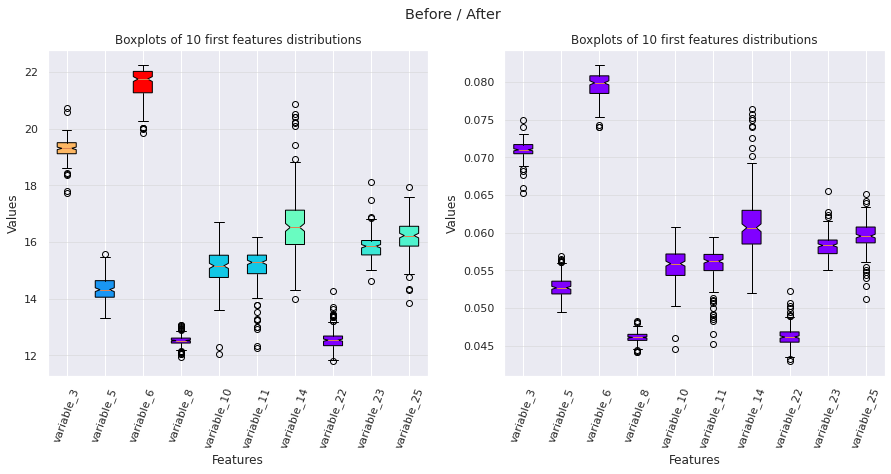

In [68]:
boxplot_first_distributions_metabolites_before_after(X_init=X, X_norm=normPeakTable(X, 'l2_normalisation', based='samples'))

## Conclusion : For the normalisation methods, the point is to make all samples comparable by aligning mean or median between samples, or setting vector norm to 1 (l1 or l2 norm)


# Combination of methods for our example

### We decide here to preprocess data with classical methods :
- first a l2 normalisation (on samples)
- then a standard scaling / autoscaling (on features)

### We first apply the normalisation on samples to make thme comparable then for the scaling of each features

In [73]:
X_ = normPeakTable(X, 'l2_normalisation', based='samples')
X_ = normPeakTable(X_, 'autoscaling', based='metabolites')
X_

,variable_3,variable_5,variable_6,variable_8,variable_10,variable_11,variable_14,variable_22,variable_23,variable_25,...,variable_2326,variable_2328,variable_2329,variable_2332,variable_2339,variable_2340,variable_2350,variable_2364,variable_2365,variable_2370
0,0.343154,0.028213,0.403068,-0.723907,0.292690,0.734648,0.454773,0.025521,1.727030,0.590418,...,0.677597,0.423164,-1.400209,0.240557,-2.650112,-0.450923,0.007627,-0.605720,-0.866681,-0.702342
1,0.514293,1.561149,-2.358937,-0.785405,-0.303024,-2.109607,0.907843,-0.497925,-0.408785,-2.637934,...,-0.764355,0.082389,-1.691867,0.524777,0.312977,0.969049,0.987275,0.839022,-0.788942,-1.081942
2,-0.966684,2.485037,0.902786,-0.487741,-0.951130,0.125416,0.549394,0.395810,0.009166,-0.094654,...,-0.716359,-0.533313,-2.338208,-0.448139,-0.692877,-0.061555,-0.308102,-0.557681,-0.267428,0.021739
3,-0.499471,2.294042,0.654866,0.200169,1.013887,1.022829,-0.895230,-0.509404,0.862195,1.225857,...,-0.623066,-0.511709,-0.896577,0.460528,-0.868587,-0.379402,-0.041673,-0.878755,-2.822468,-0.555637
4,0.789406,0.370597,1.186125,-1.139745,-0.288708,0.235699,-0.056561,-0.896501,0.840488,-0.160630,...,-0.646925,-0.792683,0.113281,-0.301686,-0.091928,0.107454,-0.002273,0.534238,-0.757552,0.268754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,1.198158,0.236352,-1.742032,0.659971,-0.497824,-1.440565,0.410328,-1.211965,-1.165634,-1.536160,...,-0.711742,-1.595635,-0.141981,-0.366404,-1.113986,-3.361035,0.435091,-0.816180,0.084109,-0.001943
182,-0.232292,1.056631,-1.337454,-0.345675,-1.122356,-0.062979,0.072807,-0.389213,1.481026,-0.550822,...,2.069408,0.135651,1.065614,-0.872576,0.369971,0.422004,-0.657858,1.670263,1.473349,1.106209
183,0.002991,0.066335,-0.175633,0.289933,-0.957686,-0.848193,-0.211333,0.888016,-0.324560,-1.040175,...,1.828458,1.319586,-0.752464,-0.255708,0.590072,3.012478,0.245043,0.309170,0.306393,0.128377
184,-0.984124,0.429884,-1.131698,-0.712588,-1.491989,-2.069547,-0.398063,0.506517,0.733195,-2.292864,...,-0.772941,-0.673446,0.064045,-0.456010,-0.519668,-2.125012,0.127153,-1.784431,0.481025,0.137774


## For the next notebook, the imputed and normalised peak table right above should be used ! We save it in a separate folder

In [77]:
peakTable_preprocessed = pd.concat([metadata, X_], axis=1)
peakTable_preprocessed

,SampleID,Groups,MatchCaseset,TypTumo,CaseHCCWide,EPICID,EPICBioID,AliquotID,variable_3,variable_5,...,variable_2326,variable_2328,variable_2329,variable_2332,variable_2339,variable_2340,variable_2350,variable_2364,variable_2365,variable_2370
0,LivCan_153,Incident,82,HCC,Yes,41____41041872,41____41041872,41041872-s2#C,0.343154,0.028213,...,0.677597,0.423164,-1.400209,0.240557,-2.650112,-0.450923,0.007627,-0.605720,-0.866681,-0.702342
1,LivCan_154,Non-case,82,NaN,No,41____41046868,41____41046868,41046868-s2#C,0.514293,1.561149,...,-0.764355,0.082389,-1.691867,0.524777,0.312977,0.969049,0.987275,0.839022,-0.788942,-1.081942
2,LivCan_267,Incident,427,HCC,Yes,41____41074588,41____41074588,41074588-s1#B,-0.966684,2.485037,...,-0.716359,-0.533313,-2.338208,-0.448139,-0.692877,-0.061555,-0.308102,-0.557681,-0.267428,0.021739
3,LivCan_268,Non-case,427,NaN,No,41____41089214,41____41089214,41089214-s1#B,-0.499471,2.294042,...,-0.623066,-0.511709,-0.896577,0.460528,-0.868587,-0.379402,-0.041673,-0.878755,-2.822468,-0.555637
4,LivCan_299,Incident,376,HCC_Wide,Yes,21____21103888,21____21103888,21103888-s1#B,0.789406,0.370597,...,-0.646925,-0.792683,0.113281,-0.301686,-0.091928,0.107454,-0.002273,0.534238,-0.757552,0.268754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,LivCan_080,Non-case,56,NaN,No,32____3208004E,32____32253231,32253231-s3#C,1.198158,0.236352,...,-0.711742,-1.595635,-0.141981,-0.366404,-1.113986,-3.361035,0.435091,-0.816180,0.084109,-0.001943
182,LivCan_375,Incident,383,HCC,Yes,22____22281416,22____22281416,22281416-s1#B,-0.232292,1.056631,...,2.069408,0.135651,1.065614,-0.872576,0.369971,0.422004,-0.657858,1.670263,1.473349,1.106209
183,LivCan_376,Non-case,383,NaN,No,22____22281701,22____22281701,22281701-s1#B,0.002991,0.066335,...,1.828458,1.319586,-0.752464,-0.255708,0.590072,3.012478,0.245043,0.309170,0.306393,0.128377
184,LivCan_165,Incident,147,HCC,Yes,71____71000825,71____71000065,71000065-s2#C,-0.984124,0.429884,...,-0.772941,-0.673446,0.064045,-0.456010,-0.519668,-2.125012,0.127153,-1.784431,0.481025,0.137774


In [79]:
peakTable_preprocessed.to_csv(pwd + 'data/peakTable/chosen_imputed_normalised_peakTable/peakTable_imputed_normalised.csv', header=True, index=False)